In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib
import warnings 

warnings.filterwarnings('ignore')

In [6]:
model=tf.keras.models.load_model('model_e100_filtered_1.h5')

In [7]:
import joblib

scl=joblib.load('scaler_e100_filtered_1.joblib')

In [8]:
df=pd.read_csv('MBS_2021_Total.csv')
df.head(20)

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,Previous_UPB,Remaining MFM
0,122752190,82021,2,3.000,3.000,597000.0,590000.00,360,12021,32021,...,3,1,5.3,2.5,5.3,2516.976081,1000.00,1492.500000,591000.00,353
1,122752190,92021,2,3.000,3.000,597000.0,589119.62,360,12021,32021,...,3,1,5.3,2.5,5.4,2516.976081,880.38,1492.500000,590000.00,352
2,122752190,102021,2,3.000,3.000,597000.0,588004.21,360,12021,32021,...,3,1,5.3,2.5,6.2,2516.976081,1115.41,1492.500000,589119.62,351
3,122752190,112021,2,3.000,3.000,597000.0,586886.01,360,12021,32021,...,3,1,5.3,2.5,6.8,2516.976081,1118.20,1492.500000,588004.21,350
4,122752190,122021,2,3.000,3.000,597000.0,585765.02,360,12021,32021,...,3,1,5.3,2.5,7.0,2516.976081,1120.99,1492.500000,586886.01,349
5,122752190,12022,2,3.000,3.000,597000.0,584641.22,360,12021,32021,...,3,1,3.6,2.3,7.5,2516.976081,1123.80,1492.500000,585765.02,348
6,122752190,22022,2,3.000,3.000,597000.0,583514.61,360,12021,32021,...,3,1,3.6,2.3,7.9,2516.976081,1126.61,1492.500000,584641.22,347
7,122128365,72021,2,2.875,2.875,566000.0,561000.00,360,12021,32021,...,3,1,5.3,2.5,5.4,2348.291420,1000.00,1356.041667,562000.00,354
8,122128365,82021,2,2.875,2.875,566000.0,560000.00,360,12021,32021,...,3,1,5.3,2.5,5.3,2348.291420,1000.00,1356.041667,561000.00,353
9,122128365,92021,2,2.875,2.875,566000.0,559004.06,360,12021,32021,...,3,1,5.3,2.5,5.4,2348.291420,995.94,1356.041667,560000.00,352


In [9]:
ic=[]

for i in range(len(df['Loan Identifier'])):
    r=df.iloc[i,4]/1200
    p=df.iloc[i,-2]

    ic.append(p*r)   


ic

[1477.5,
 1475.0,
 1472.79905,
 1470.010525,
 1467.215025,
 1464.41255,
 1461.60305,
 1346.4583333333333,
 1344.0625,
 1341.6666666666665,
 1339.2805604166667,
 1336.8631166666667,
 1334.4398749999998,
 1332.0108354166666,
 377.60416666666663,
 375.703046875,
 374.4006770833333,
 374.4006770833333,
 373.74695312499995,
 373.0915364583333,
 371.775546875,
 1529.8833333333334,
 1527.3916666666667,
 1523.6435770833334,
 1520.945725,
 1518.2411703333335,
 1515.52986325,
 1512.81180375,
 806.25,
 802.0833333333334,
 800.2044375,
 797.5329375,
 794.855875,
 792.1732499999999,
 786.7911875,
 302.0833333333333,
 300.0,
 298.1382708333333,
 296.53516666666667,
 294.9588125,
 294.9588125,
 293.37916666666666,
 1849.375,
 1844.6394541666666,
 1844.6394541666666,
 1839.7000874999999,
 1833.27299375,
 1829.7839770833332,
 1824.81055625,
 902.0,
 899.25,
 898.1499174999999,
 896.6405799999999,
 895.12709,
 893.6094475,
 892.087625,
 457.9166666666667,
 455.0,
 455.71195833333337,
 454.9717666666667,

In [10]:
df['Interest_Component']=ic
df

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,Previous_UPB,Remaining MFM
0,122752190,82021,2,3.000,3.000,597000.0,590000.00,360,12021,32021,...,3,1,5.3,2.5,5.3,2516.976081,1000.00,1477.500000,591000.00,353
1,122752190,92021,2,3.000,3.000,597000.0,589119.62,360,12021,32021,...,3,1,5.3,2.5,5.4,2516.976081,880.38,1475.000000,590000.00,352
2,122752190,102021,2,3.000,3.000,597000.0,588004.21,360,12021,32021,...,3,1,5.3,2.5,6.2,2516.976081,1115.41,1472.799050,589119.62,351
3,122752190,112021,2,3.000,3.000,597000.0,586886.01,360,12021,32021,...,3,1,5.3,2.5,6.8,2516.976081,1118.20,1470.010525,588004.21,350
4,122752190,122021,2,3.000,3.000,597000.0,585765.02,360,12021,32021,...,3,1,5.3,2.5,7.0,2516.976081,1120.99,1467.215025,586886.01,349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,126241093,32022,2,3.375,3.375,465000.0,458957.26,360,62021,82021,...,3,0,3.6,2.3,8.5,2055.747378,762.79,1292.962641,459720.05,351
2488,126241093,42022,2,3.375,3.375,465000.0,458192.33,360,62021,82021,...,3,0,3.6,2.3,8.3,2055.747378,764.93,1290.817294,458957.26,350
2489,126241093,52022,2,3.375,3.375,465000.0,457425.25,360,62021,82021,...,3,0,3.6,2.3,8.6,2055.747378,767.08,1288.665928,458192.33,349
2490,126241093,62022,2,3.375,3.375,465000.0,456656.01,360,62021,82021,...,3,0,3.6,2.3,9.1,2055.747378,769.24,1286.508516,457425.25,348


In [11]:
# top_entries = pd.DataFrame(columns=df.columns)
# grouped = df.groupby('Loan Identifier')

# for loan_id, group in grouped:
#     top_7 = group.head(7)
    
#     top_entries = top_entries.append(top_7)

# # print(top_entries)
# df=top_entries

In [12]:
# df=df.drop(['PREPAYMENT_AMT'],axis=1)

In [13]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'
# and has columns 'LoanID' and 'Entry'

# Define a custom function to select the top 7 entries for each loan group
def select_top_entries(group):
    return group.head(7)

# Create a new DataFrame with the top 7 entries for each loan
top_entries = df.groupby('Loan Identifier').apply(select_top_entries)

# Reset the index of the resulting DataFrame
top_entries = top_entries.reset_index(drop=True)

# Print the resulting DataFrame with the top 7 entries for each loan
# print(top_entries)
df=top_entries
df


,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,Previous_UPB,Remaining MFM
0,122752190,82021,2,3.000,3.000,597000.0,590000.00,360,12021,32021,...,3,1,5.3,2.5,5.3,2516.976081,1000.00,1477.500000,591000.00,353
1,122752190,92021,2,3.000,3.000,597000.0,589119.62,360,12021,32021,...,3,1,5.3,2.5,5.4,2516.976081,880.38,1475.000000,590000.00,352
2,122752190,102021,2,3.000,3.000,597000.0,588004.21,360,12021,32021,...,3,1,5.3,2.5,6.2,2516.976081,1115.41,1472.799050,589119.62,351
3,122752190,112021,2,3.000,3.000,597000.0,586886.01,360,12021,32021,...,3,1,5.3,2.5,6.8,2516.976081,1118.20,1470.010525,588004.21,350
4,122752190,122021,2,3.000,3.000,597000.0,585765.02,360,12021,32021,...,3,1,5.3,2.5,7.0,2516.976081,1120.99,1467.215025,586886.01,349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,126241093,32022,2,3.375,3.375,465000.0,458957.26,360,62021,82021,...,3,0,3.6,2.3,8.5,2055.747378,762.79,1292.962641,459720.05,351
2488,126241093,42022,2,3.375,3.375,465000.0,458192.33,360,62021,82021,...,3,0,3.6,2.3,8.3,2055.747378,764.93,1290.817294,458957.26,350
2489,126241093,52022,2,3.375,3.375,465000.0,457425.25,360,62021,82021,...,3,0,3.6,2.3,8.6,2055.747378,767.08,1288.665928,458192.33,349
2490,126241093,62022,2,3.375,3.375,465000.0,456656.01,360,62021,82021,...,3,0,3.6,2.3,9.1,2055.747378,769.24,1286.508516,457425.25,348


In [14]:
df.head(30)

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,Previous_UPB,Remaining MFM
0,122752190,82021,2,3.000,3.000,597000.0,590000.00,360,12021,32021,...,3,1,5.3,2.5,5.3,2516.976081,1000.00,1477.500000,591000.00,353
1,122752190,92021,2,3.000,3.000,597000.0,589119.62,360,12021,32021,...,3,1,5.3,2.5,5.4,2516.976081,880.38,1475.000000,590000.00,352
2,122752190,102021,2,3.000,3.000,597000.0,588004.21,360,12021,32021,...,3,1,5.3,2.5,6.2,2516.976081,1115.41,1472.799050,589119.62,351
3,122752190,112021,2,3.000,3.000,597000.0,586886.01,360,12021,32021,...,3,1,5.3,2.5,6.8,2516.976081,1118.20,1470.010525,588004.21,350
4,122752190,122021,2,3.000,3.000,597000.0,585765.02,360,12021,32021,...,3,1,5.3,2.5,7.0,2516.976081,1120.99,1467.215025,586886.01,349
5,122752190,12022,2,3.000,3.000,597000.0,584641.22,360,12021,32021,...,3,1,3.6,2.3,7.5,2516.976081,1123.80,1464.412550,585765.02,348
6,122752190,22022,2,3.000,3.000,597000.0,583514.61,360,12021,32021,...,3,1,3.6,2.3,7.9,2516.976081,1126.61,1461.603050,584641.22,347
7,122128365,72021,2,2.875,2.875,566000.0,561000.00,360,12021,32021,...,3,1,5.3,2.5,5.4,2348.291420,1000.00,1346.458333,562000.00,354
8,122128365,82021,2,2.875,2.875,566000.0,560000.00,360,12021,32021,...,3,1,5.3,2.5,5.3,2348.291420,1000.00,1344.062500,561000.00,353
9,122128365,92021,2,2.875,2.875,566000.0,559004.06,360,12021,32021,...,3,1,5.3,2.5,5.4,2348.291420,995.94,1341.666667,560000.00,352


In [15]:
test_pool=df.drop_duplicates(subset='Loan Identifier', keep ='first')
# test_pool=test_pool[0:1]
test_pool

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,Previous_UPB,Remaining MFM
0,122752190,82021,2,3.000,3.000,597000.0,590000.00,360,12021,32021,...,3,1,5.3,2.5,5.3,2516.976081,1000.00,1477.500000,591000.0,353
7,122128365,72021,2,2.875,2.875,566000.0,561000.00,360,12021,32021,...,3,1,5.3,2.5,5.4,2348.291420,1000.00,1346.458333,562000.0,354
14,124608145,112021,1,3.125,3.125,146000.0,144269.97,360,32021,52021,...,3,0,5.3,2.5,6.8,625.428160,730.03,377.604167,145000.0,352
21,128916893,52022,0,2.990,2.990,619000.0,613000.00,360,102021,122021,...,0,0,3.6,2.3,8.6,2606.391737,1000.00,1529.883333,614000.0,353
28,124138323,102021,2,2.500,2.500,393000.0,385000.00,240,32021,52021,...,3,0,5.3,2.5,6.2,2082.518370,2000.00,806.250000,387000.0,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,122540657,72021,1,3.625,3.625,162000.0,161000.00,360,122020,22021,...,0,0,5.3,2.5,5.4,738.803109,0.00,486.354167,161000.0,353
2464,122128367,72021,0,2.875,2.875,765000.0,758000.00,360,122020,32021,...,0,1,5.3,2.5,5.4,3173.927450,2000.00,1820.833333,760000.0,353
2471,124427543,112021,0,2.990,2.990,249000.0,246000.00,360,52021,72021,...,0,0,5.3,2.5,6.8,1048.451603,1000.00,615.441667,247000.0,354
2478,129753945,62022,2,2.875,2.875,67000.0,54000.00,120,122021,22022,...,3,0,3.6,2.3,9.1,643.098263,2000.00,134.166667,56000.0,114


In [16]:
test_pool['Previous_UPB'].sum()

106050596.13

In [17]:
test_pool['Current Actual UPB'].sum()

105586100.97000001

In [18]:
test_pool['EMI'].sum()

506680.7734295022

In [19]:
y=test_pool.groupby(['Loan Identifier'])['Current Actual UPB'].sum()
y

Loan Identifier
122128352    815000.0
122128358    544000.0
122128364    711000.0
122128365    561000.0
122128367    758000.0
               ...   
129753919     61000.0
129753926    309000.0
129753930    289000.0
129753932    108000.0
129753945     54000.0
Name: Current Actual UPB, Length: 356, dtype: float64

In [20]:
li4=list(df['Current Actual UPB'])
li4

[590000.0,
 589119.62,
 588004.21,
 586886.01,
 585765.02,
 584641.22,
 583514.61,
 561000.0,
 560000.0,
 559004.06,
 557995.04,
 556983.6,
 555969.74,
 554953.45,
 144269.97,
 143769.86,
 143769.86,
 143518.83,
 143267.15,
 142761.81,
 142508.16,
 613000.0,
 611495.75,
 610413.0,
 609327.56,
 608239.41,
 607148.55,
 606054.97,
 385000.0,
 384098.13,
 382815.81,
 381530.82,
 380243.16,
 377659.77,
 377659.77,
 144000.0,
 143106.37,
 142336.88,
 141580.23,
 141580.23,
 140822.0,
 140062.19,
 804933.58,
 804933.58,
 802778.22,
 799973.67,
 798451.19,
 796280.97,
 794105.78,
 327000.0,
 326599.97,
 326051.12,
 325500.76,
 324948.89,
 324395.5,
 323840.59,
 156000.0,
 156244.1,
 155990.32,
 155735.8,
 155480.54,
 155224.53,
 154967.78,
 395938.66,
 395208.97,
 394477.61,
 393744.57,
 393009.85,
 392273.45,
 391535.36,
 163000.0,
 162574.63,
 162032.17,
 161535.79,
 161038.01,
 160538.83,
 160038.25,
 318000.0,
 318000.0,
 317276.41,
 316738.69,
 316199.51,
 315658.87,
 315116.77,
 277000.0

In [21]:
test_pool=test_pool[test_pool['Original UPB']!=test_pool['Current Actual UPB']]

In [22]:
test_pool

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,Previous_UPB,Remaining MFM
0,122752190,82021,2,3.000,3.000,597000.0,590000.00,360,12021,32021,...,3,1,5.3,2.5,5.3,2516.976081,1000.00,1477.500000,591000.0,353
7,122128365,72021,2,2.875,2.875,566000.0,561000.00,360,12021,32021,...,3,1,5.3,2.5,5.4,2348.291420,1000.00,1346.458333,562000.0,354
14,124608145,112021,1,3.125,3.125,146000.0,144269.97,360,32021,52021,...,3,0,5.3,2.5,6.8,625.428160,730.03,377.604167,145000.0,352
21,128916893,52022,0,2.990,2.990,619000.0,613000.00,360,102021,122021,...,0,0,3.6,2.3,8.6,2606.391737,1000.00,1529.883333,614000.0,353
28,124138323,102021,2,2.500,2.500,393000.0,385000.00,240,32021,52021,...,3,0,5.3,2.5,6.2,2082.518370,2000.00,806.250000,387000.0,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,122540657,72021,1,3.625,3.625,162000.0,161000.00,360,122020,22021,...,0,0,5.3,2.5,5.4,738.803109,0.00,486.354167,161000.0,353
2464,122128367,72021,0,2.875,2.875,765000.0,758000.00,360,122020,32021,...,0,1,5.3,2.5,5.4,3173.927450,2000.00,1820.833333,760000.0,353
2471,124427543,112021,0,2.990,2.990,249000.0,246000.00,360,52021,72021,...,0,0,5.3,2.5,6.8,1048.451603,1000.00,615.441667,247000.0,354
2478,129753945,62022,2,2.875,2.875,67000.0,54000.00,120,122021,22022,...,3,0,3.6,2.3,9.1,643.098263,2000.00,134.166667,56000.0,114


In [23]:
test_pool=test_pool.drop_duplicates(subset=['Loan Identifier'],keep='first')
test_pool.columns

Index(['Loan Identifier', 'Monthly Reporting Period', 'Channel',
       'Original Interest Rate', 'Current Interest Rate', 'Original UPB',
       'Current Actual UPB', 'Original Loan Term', 'Origination Date',
       'First Payment Date', 'Remaining Months To Maturity',
       'Original Loan to Value Ratio (LTV)', 'Debt-To-Income (DTI)',
       'Borrower Credit Score at Origination',
       'First Time Home Buyer Indicator', 'Loan Purpose', 'Property Type',
       'Number of Units', 'Occupancy Status',
       'Metropolitan Statistical Area (MSA)', 'Zip Code Short',
       'Interest Only Loan Indicator', 'Current Loan Delinquency Status',
       'Modification Flag', 'Zero Balance Code', 'Special Eligibility Program',
       'Property Valuation Method', 'High Balance Loan Indicator',
       'Unemployment_rate', 'Divorce_rate', 'Inflation_rate', 'EMI',
       'UPB_diff', 'Interest_Component', 'Previous_UPB', 'Remaining MFM'],
      dtype='object')

In [24]:
test_pool.drop(['Loan Identifier','EMI','UPB_diff','Interest_Component','Remaining Months To Maturity'], axis=1, inplace = True)
test_pool

,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,Original Loan to Value Ratio (LTV),...,Modification Flag,Zero Balance Code,Special Eligibility Program,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,Previous_UPB,Remaining MFM
0,82021,2,3.000,3.000,597000.0,590000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.3,591000.0,353
7,72021,2,2.875,2.875,566000.0,561000.00,360,12021,32021,57,...,0.0,0.0,0,3,1,5.3,2.5,5.4,562000.0,354
14,112021,1,3.125,3.125,146000.0,144269.97,360,32021,52021,67,...,0.0,0.0,0,3,0,5.3,2.5,6.8,145000.0,352
21,52022,0,2.990,2.990,619000.0,613000.00,360,102021,122021,73,...,0.0,0.0,0,0,0,3.6,2.3,8.6,614000.0,353
28,102021,2,2.500,2.500,393000.0,385000.00,240,32021,52021,73,...,0.0,0.0,0,3,0,5.3,2.5,6.2,387000.0,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,72021,1,3.625,3.625,162000.0,161000.00,360,122020,22021,75,...,0.0,0.0,0,0,0,5.3,2.5,5.4,161000.0,353
2464,72021,0,2.875,2.875,765000.0,758000.00,360,122020,32021,51,...,0.0,0.0,0,0,1,5.3,2.5,5.4,760000.0,353
2471,112021,0,2.990,2.990,249000.0,246000.00,360,52021,72021,64,...,0.0,0.0,0,0,0,5.3,2.5,6.8,247000.0,354
2478,62022,2,2.875,2.875,67000.0,54000.00,120,122021,22022,8,...,0.0,0.0,0,3,0,3.6,2.3,9.1,56000.0,114


In [25]:
test_pool['Modification Flag']=test_pool['Modification Flag'].fillna(2)

In [26]:
test_pool.isnull().sum()

Monthly Reporting Period                0
Channel                                 0
Original Interest Rate                  0
Current Interest Rate                   0
Original UPB                            0
Current Actual UPB                      0
Original Loan Term                      0
Origination Date                        0
First Payment Date                      0
Original Loan to Value Ratio (LTV)      0
Debt-To-Income (DTI)                    0
Borrower Credit Score at Origination    0
First Time Home Buyer Indicator         0
Loan Purpose                            0
Property Type                           0
Number of Units                         0
Occupancy Status                        0
Metropolitan Statistical Area (MSA)     0
Zip Code Short                          0
Interest Only Loan Indicator            0
Current Loan Delinquency Status         0
Modification Flag                       0
Zero Balance Code                       0
Special Eligibility Program       

In [27]:
X_test_pool=test_pool.drop(['Current Actual UPB'],axis=1)

In [28]:
X_test_pool2=X_test_pool

In [29]:
y_test_pool=test_pool['Current Actual UPB']

In [30]:
def scale(value, att_index):
    scaled = (value - scl.mean_[att_index])/ scl.scale_[att_index]
    return scaled

In [31]:
def update(mrp):
    if((mrp//10000)==12):
        mrp = mrp - 110000 + 1
    else:
        mrp += 10000
    return mrp

In [32]:
Unemploy={"2000":4.0,
     "2001":4.7,
     "2002":5.8,
     "2003":6.0,
     "2004":5.5,
     "2005":5.1,
     "2006":4.6,
     "2007":4.6,
     "2008":5.8,
     "2009":9.3,
     "2010":9.6,
     "2011":8.9,
     "2012":8.1,
     "2013":7.4,
     "2014":6.2,
     "2015":5.3,
     "2016":4.9,
     "2017":4.4,
     "2018":3.9,
     "2019":3.7,
     "2020":8.1,
     "2021":5.3,
     "2022":3.6,
     "2023":3.4
     }

In [33]:
divorce={"2000":4.0,
     "2001":4.0,
     "2002":3.9,
     "2003":3.8,
     "2004":3.7,
     "2005":3.6,
     "2006":3.7,
     "2007":3.6,
     "2008":3.5,
     "2009":3.5,
     "2010":3.6,
     "2011":3.6,
     "2012":3.4,
     "2013":3.3,
     "2014":3.2,
     "2015":3.1,
     "2016":3.0,
     "2017":2.9,
     "2018":2.9,
     "2019":2.7,
     "2020":2.3,
     "2021":2.5,
     "2022":2.3,
     "2023":2.3
     }

In [34]:
inflation_data = {
    "12022": 7.5,
    "22022": 7.9,
    "32022": 8.5,
    "42022": 8.3,
    "52022": 8.6,
    "62022": 9.1,
    "72022": 8.5,
    "82022": 8.3,
    "92022": 8.2,
    "102022": 7.7,
    "112022": 7.1,
    "122022": 6.5,
    "12021": 1.4,
    "22021": 1.7,
    "32021": 2.6,
    "42021": 4.2,
    "52021": 5.0,
    "62021": 5.4,
    "72021": 5.4,
    "82021": 5.3,
    "92021": 5.4,
    "102021": 6.2,
    "112021": 6.8,
    "122021": 7.0,
    "12020": 2.5,
    "22020": 2.3,
    "32020": 1.5,
    "42020": 0.3,
    "52020": 0.1,
    "62020": 0.6,
    "72020": 1.0,
    "82020": 1.3,
    "92020": 1.4,
    "102020": 1.2,
    "112020": 1.2,
    "122020": 1.4,
    "12019": 1.6,
    "22019": 1.5,
    "32019": 1.9,
    "42019": 2.0,
    "52019": 1.8,
    "62019": 1.6,
    "72019": 1.8,
    "82019": 1.7,
    "92019": 1.7,
    "102019": 1.8,
    "112019": 2.1,
    "122019": 2.3,
    "12018": 2.1,
    "22018": 2.2,
    "32018": 2.4,
    "42018": 2.5,
    "52018": 2.8,
    "62018": 2.9,
    "72018": 2.9,
    "82018": 2.7,
    "92018": 2.3,
    "102018": 2.5,
    "112018": 2.2,
    "122018": 1.9,
    "12017": 2.5,
    "22017": 2.7,
    "32017": 2.4,
    "42017": 2.2,
    "52017": 1.9,
    "62017": 1.6,
    "72017": 1.7,
    "82017": 1.9,
    "92017": 2.2,
    "102017": 2.0,
    "112017": 2.2,
    "122017": 2.1,
    "12016": 1.4,
    "22016": 1.0,
    "32016": 0.9,
    "42016": 1.1,
    "52016": 1.0,
    "62016": 1.0,
    "72016": 0.8,
    "82016": 1.1,
    "92016": 1.5,
    "102016": 1.6,
    "112016": 1.7,
    "122016": 2.1,
    "12015": -0.1,
    "22015": 0.0,
    "32015": -0.1,
    "42015": -0.2,
    "52015": 0.0,
    "62015": 0.1,
    "72015": 0.2,
    "82015": 0.2,
    "92015": 0.0,
    "102015": 0.2,
    "112015": 0.5,
    "122015": 0.7,
    "12014": 1.6,
    "22014": 1.1,
    "32014": 1.5,
    "42014": 2.0,
    "52014": 2.1,
    "62014": 2.1,
    "72014": 2.0,
    "82014": 1.7,
    "92014": 1.7,
    "102014": 1.7,
    "112014": 1.3,
    "122014": 0.8,
    "12013": 1.6,
    "22013": 2.0,
    "32013": 1.5,
    "42013": 1.1,
    "52013": 1.4,
    "62013": 1.8,
    "72013": 2.0,
    "82013": 1.5,
    "92013": 1.2,
    "102013": 1.0,
    "112013": 1.2,
    "122013": 1.5,
    "12012": 2.9,
    "22012": 2.9,
    "32012": 2.7,
    "42012": 2.3,
    "52012": 1.7,
    "62012": 1.7,
    "72012": 1.4,
    "82012": 1.7,
    "92012": 2.0,
    "102012": 2.2,
    "112012": 1.8,
    "122012": 1.7,
    "12011": 1.6,
    "22011": 2.1,
    "32011": 2.7,
    "42011": 3.2,
    "52011": 3.6,
    "62011": 3.6,
    "72011": 3.6,
    "82011": 3.8,
    "92011": 3.9,
    "102011": 3.5,
    "112011": 3.4,
    "122011": 3.0,
    "12010": 2.6,
    "22010": 2.1,
    "32010": 2.3,
    "42010": 2.2,
    "52010": 2.0,
    "62010": 1.1,
    "72010": 1.2,
    "82010": 1.1,
    "92010": 1.1,
    "102010": 1.2,
    "112010": 1.1,
    "122010": 1.5,
    "12009": 0.0,
    "22009": 0.2,
    "32009": -0.4,
    "42009": -0.7,
    "52009": -1.3,
    "62009": -1.4,
    "72009": -2.1,
    "82009": -1.5,
    "92009": -1.3,
    "102009": -0.2,
    "112009": 1.8,
    "122009": 2.7,
    "12008": 4.3,
    "22008": 4.0,
    "32008": 4.0,
    "42008": 3.9,
    "52008": 4.2,
    "62008": 5.0,
    "72008": 5.6,
    "82008": 5.4,
    "92008": 4.9,
    "102008": 3.7,
    "112008": 1.1,
    "122008": 0.1,
    "12007": 2.1,
    "22007": 2.4,
    "32007": 2.8,
    "42007": 2.6,
    "52007": 2.7,
    "62007": 2.7,
    "72007": 2.4,
    "82007": 2.0,
    "92007": 2.8,
    "102007": 3.5,
    "112007": 4.3,
    "122007": 4.1,
    "12006": 4.0,
    "22006": 3.6,
    "32006": 3.4,
    "42006": 3.5,
    "52006": 4.2,
    "62006": 4.3,
    "72006": 4.1,
    "82006": 3.8,
    "92006": 2.1,
    "102006": 1.3,
    "112006": 2.0,
    "122006": 2.5,
    "12005": 3.0,
    "22005": 3.0,
    "32005": 3.1,
    "42005": 3.5,
    "52005": 2.8,
    "62005": 2.5,
    "72005": 3.2,
    "82005": 3.6,
    "92005": 4.7,
    "102005": 4.3,
    "112005": 3.5,
    "122005": 3.4,
    "12004": 1.9,
    "22004": 1.7,
    "32004": 1.7,
    "42004": 2.3,
    "52004": 3.1,
    "62004": 3.3,
    "72004": 3.0,
    "82004": 2.7,
    "92004": 2.5,
    "102004": 3.2,
    "112004": 3.5,
    "122004": 3.3,
    "12003": 2.6, 
    "22003": 3.0, 
    "32003": 3.0, 
    "42003": 2.2, 
    "52003": 2.1, 
    "62003": 2.1,
    "72003": 2.1, 
    "82003": 2.2, 
    "92003": 2.3, 
    "102003": 2.0, 
    "112003": 1.8, 
    "122003": 1.9,
    "12002": 1.1, 
    "22002": 1.1, 
    "32002": 1.5, 
    "42002": 1.6, 
    "52002": 1.2, 
    "62002": 1.1,
    "72002": 1.5, 
    "82002": 1.8, 
    "92002": 1.5, 
    "102002": 2.0, 
    "112002": 2.2, 
    "122002": 2.4,
    "12001": 3.7, 
    "22001": 3.5, 
    "32001": 2.9, 
    "42001": 3.3, 
    "52001": 3.6, 
    "62001": 3.2,
    "72001": 2.7, 
    "82001": 2.7, 
    "92001": 2.6, 
    "102001": 2.1, 
    "112001": 1.9, 
    "122001": 1.6,
    "12000": 2.7, 
    "22000": 3.2, 
    "32000": 3.8, 
    "42000": 3.1, 
    "52000": 3.2, 
    "62000": 3.7,
    "72000": 3.7, 
    "82000": 3.4, 
    "92000": 3.5, 
    "102000": 3.4, 
    "112000": 3.4, 
    "122000": 3.4,
    "12023": 6.4,
    "22023": 6.0,
    "32023": 5.0,
    "42023": 4.9
}

In [35]:
li2=[]
pc_cupb=[]

def dnn_forecast(test_pool): 
    for i in range(len(test_pool)):
        testing_x=test_pool[i:i+1]
        test_unscaled=testing_x
        testing_x=scl.transform(testing_x)

        fore=[]

        p=testing_x[0]
        # pre=p[28]
        single_entry = np.expand_dims(p, axis=0)

        for j in range(7):     
            g=model.predict(single_entry)

            # g[0][0]=g[0][0]-(296)*(j+1)
            # g[0][0]=g[0][0]*(np.exp(-0.001))

            fore.append(g[0][0])

            cal_upb=float(df['EMI'][i*7+j])-(g[0][0])*(float(test_unscaled['Current Interest Rate']))/1200
            pc_cupb.append(cal_upb)
            

            test_unscaled['Previous_UPB']=g[0][0]
            test_unscaled['Monthly Reporting Period']=update(int(test_unscaled['Monthly Reporting Period']))
            k=str(int(test_unscaled['Monthly Reporting Period']))
            k=k[::-1]
            r=k[:4]

            r=r[::-1]
            # print(r)

            if(k=="52023"):
                print("done")
                break
            
            test_unscaled['Unemployment_rate']=Unemploy[r]
            test_unscaled['Divorce_rate']=divorce[r]
            test_unscaled['Inflation_rate']=inflation_data[str(int(test_unscaled['Monthly Reporting Period']))]
            test_unscaled['Remaining MFM']=int(test_unscaled['Remaining MFM'])-1

            test_scaled=(scl.transform(test_unscaled))[0]
            single_entry = np.expand_dims(test_scaled, axis=0)

        li2.append(fore)

In [36]:
dnn_forecast(X_test_pool)

1/1 [==============================] - 0s 34ms/step


In [37]:
pc_cupb

[1041.5445188648519,
 1043.6279563648518,
 1045.7440501148517,
 1047.8903001148517,
 1050.0567063648518,
 1052.1674876148518,
 1054.3035813648519,
 1003.7118694694541,
 1005.5996363965373,
 1007.5011793652873,
 1009.4331194694541,
 1011.3909645215374,
 1013.3652809277874,
 1015.2750595736206,
 248.41237192343777,
 249.00319223593777,
 249.52544972291696,
 250.05047413697946,
 250.57932342083365,
 251.11065480104196,
 251.64841521770865,
 1078.68051379733,
 1080.8724018181633,
 1083.0733221306632,
 1085.28701223483,
 1087.514873693163,
 1089.7530132764964,
 1092.0004966098297,
 1278.8121196165841,
 1281.3737732624174,
 1283.9524841999173,
 1286.4879659707508,
 1289.0405050332506,
 1291.6107524290842,
 1294.1974060749176,
 699.567895544689,
 701.047973669689,
 702.540551794689,
 704.0478109092724,
 705.5691976280223,
 707.1046793988556,
 708.6552653363556,
 1509.304421873073,
 1512.238757810573,
 1515.1779635397397,
 1518.1249036439062,
 1521.0635364564064,
 1523.999734373073,
 1526.9347

In [38]:
li2
pred_list_upb= li2

In [39]:
li2

[[590172.6, 589339.25, 588492.8, 587634.3, 586767.75, 585923.44, 585069.0],
 [561215.8, 560427.9, 559634.2, 558827.8, 558010.6, 557186.56, 556389.44],
 [144774.06, 144547.19, 144346.64, 144145.03, 143941.95, 143737.92, 143531.42],
 [613128.25, 612248.56, 611365.25, 610476.8, 609582.7, 608684.44, 607782.44],
 [385779.0, 384549.4, 383311.62, 382094.6, 380869.38, 379635.66, 378394.06],
 [144295.64, 143585.2, 142868.77, 142145.28, 141415.02, 140677.98, 139933.7],
 [805718.44, 804438.0, 803155.44, 801869.5, 800587.2, 799305.94, 798025.2],
 [327489.94, 327007.84, 326521.84, 326031.3, 325538.3, 325041.53, 324540.4],
 [156646.2, 156288.19, 155925.86, 155559.23, 155188.22, 154812.75, 154432.78],
 [396238.25, 395470.47, 394728.22, 393979.53, 393223.9, 392463.22, 391696.22],
 [163544.53, 163112.95, 162677.84, 162238.81, 161797.33, 161353.11, 160906.31],
 [318605.9, 318210.22, 317811.7, 317409.72, 317007.1, 316602.8, 316196.56],
 [277800.22, 277597.2, 277460.28, 277321.34, 277180.97, 277036.66, 27

In [40]:
test_pool

,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,Original Loan to Value Ratio (LTV),...,Modification Flag,Zero Balance Code,Special Eligibility Program,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,Previous_UPB,Remaining MFM
0,82021,2,3.000,3.000,597000.0,590000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.3,591000.0,353
7,72021,2,2.875,2.875,566000.0,561000.00,360,12021,32021,57,...,0.0,0.0,0,3,1,5.3,2.5,5.4,562000.0,354
14,112021,1,3.125,3.125,146000.0,144269.97,360,32021,52021,67,...,0.0,0.0,0,3,0,5.3,2.5,6.8,145000.0,352
21,52022,0,2.990,2.990,619000.0,613000.00,360,102021,122021,73,...,0.0,0.0,0,0,0,3.6,2.3,8.6,614000.0,353
28,102021,2,2.500,2.500,393000.0,385000.00,240,32021,52021,73,...,0.0,0.0,0,3,0,5.3,2.5,6.2,387000.0,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,72021,1,3.625,3.625,162000.0,161000.00,360,122020,22021,75,...,0.0,0.0,0,0,0,5.3,2.5,5.4,161000.0,353
2464,72021,0,2.875,2.875,765000.0,758000.00,360,122020,32021,51,...,0.0,0.0,0,0,1,5.3,2.5,5.4,760000.0,353
2471,112021,0,2.990,2.990,249000.0,246000.00,360,52021,72021,64,...,0.0,0.0,0,0,0,5.3,2.5,6.8,247000.0,354
2478,62022,2,2.875,2.875,67000.0,54000.00,120,122021,22022,8,...,0.0,0.0,0,3,0,3.6,2.3,9.1,56000.0,114


In [41]:
df[14:21]

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,Previous_UPB,Remaining MFM
14,124608145,112021,1,3.125,3.125,146000.0,144269.97,360,32021,52021,...,3,0,5.3,2.5,6.8,625.42816,730.03,377.604167,145000.00,352
15,124608145,122021,1,3.125,3.125,146000.0,143769.86,360,32021,52021,...,3,0,5.3,2.5,7.0,625.42816,500.11,375.703047,144269.97,351
16,124608145,12022,1,3.125,3.125,146000.0,143769.86,360,32021,52021,...,3,0,3.6,2.3,7.5,625.42816,0.00,374.400677,143769.86,350
17,124608145,22022,1,3.125,3.125,146000.0,143518.83,360,32021,52021,...,3,0,3.6,2.3,7.9,625.42816,251.03,374.400677,143769.86,349
18,124608145,32022,1,3.125,3.125,146000.0,143267.15,360,32021,52021,...,3,0,3.6,2.3,8.5,625.42816,251.68,373.746953,143518.83,348
19,124608145,42022,1,3.125,3.125,146000.0,142761.81,360,32021,52021,...,3,0,3.6,2.3,8.3,625.42816,505.34,373.091536,143267.15,347
20,124608145,52022,1,3.125,3.125,146000.0,142508.16,360,32021,52021,...,3,0,3.6,2.3,8.6,625.42816,253.65,371.775547,142761.81,346


In [42]:
for i in li2:
    for j in range(len(i)-1):
        print(i[j]-i[j+1])

    print('\n')

833.375
846.4375
858.5
866.5625
844.3125
854.4375


787.9375
793.6875
806.375
817.1875
824.0625
797.125


226.875
200.54688
201.60938
203.07812
204.03125
206.5


879.6875
883.3125
888.4375
894.125
898.25
902.0


1229.5938
1237.7812
1217.0312
1225.2188
1233.7188
1241.5938


710.4375
716.4375
723.4844
730.2656
737.03125
744.28125


1280.4375
1282.5625
1285.9375
1282.3125
1281.25
1280.75


482.09375
486.0
490.53125
493.0
496.78125
501.125


358.01562
362.32812
366.625
371.01562
375.46875
379.96875


767.78125
742.25
748.6875
755.625
760.6875
767.0


431.57812
435.10938
439.03125
441.48438
444.21875
446.79688


395.6875
398.53125
401.96875
402.625
404.28125
406.25


203.03125
136.90625
138.9375
140.375
144.3125
146.71875


704.8125
710.34375
684.3125
690.1875
696.59375
701.0


298.9375
302.34375
308.71875
314.09375
319.1875
325.40625


826.84375
834.34375
839.0625
844.875
851.0
856.21875


633.03125
636.78125
641.34375
646.125
650.1875
654.0625


437.90625
440.9375
445.32812
448.375
451.01

In [43]:
actual_list_upb=[]

for i in range(len(test_pool['Current Actual UPB'])):
    act_list_1=[]

    for j in range(7):
        act_list_1.append(df.iloc[7*i+j,6])

    actual_list_upb.append(act_list_1)

actual_list_upb

[[590000.0, 589119.62, 588004.21, 586886.01, 585765.02, 584641.22, 583514.61],
 [561000.0, 560000.0, 559004.06, 557995.04, 556983.6, 555969.74, 554953.45],
 [144269.97, 143769.86, 143769.86, 143518.83, 143267.15, 142761.81, 142508.16],
 [613000.0, 611495.75, 610413.0, 609327.56, 608239.41, 607148.55, 606054.97],
 [385000.0, 384098.13, 382815.81, 381530.82, 380243.16, 377659.77, 377659.77],
 [144000.0, 143106.37, 142336.88, 141580.23, 141580.23, 140822.0, 140062.19],
 [804933.58, 804933.58, 802778.22, 799973.67, 798451.19, 796280.97, 794105.78],
 [327000.0, 326599.97, 326051.12, 325500.76, 324948.89, 324395.5, 323840.59],
 [156000.0, 156244.1, 155990.32, 155735.8, 155480.54, 155224.53, 154967.78],
 [395938.66, 395208.97, 394477.61, 393744.57, 393009.85, 392273.45, 391535.36],
 [163000.0, 162574.63, 162032.17, 161535.79, 161038.01, 160538.83, 160038.25],
 [318000.0, 318000.0, 317276.41, 316738.69, 316199.51, 315658.87, 315116.77],
 [277000.0, 277000.0, 276121.54, 275631.26, 275139.76, 27

In [44]:
actual_list_pc=[]

for i in range(len(test_pool['Current Actual UPB'])):
    act_list_1=[]

    for j in range(7):
        act_list_1.append(df.iloc[7*i+j,-5]-df.iloc[7*i+j,-3])

    actual_list_pc.append(act_list_1)

actual_list_pc

[[1039.4760813648518,
  1041.9760813648518,
  1044.1770313648517,
  1046.9655563648519,
  1049.7610563648518,
  1052.5635313648518,
  1055.3730313648518],
 [1001.8330869173708,
  1004.228920250704,
  1006.6247535840375,
  1009.0108598340373,
  1011.4283035840374,
  1013.8515452507042,
  1016.2805848340374],
 [247.82399301718783,
  249.72511280885448,
  251.02748260052118,
  251.02748260052118,
  251.6812065588545,
  252.33662322552118,
  253.65261280885449],
 [1076.5084033806631,
  1079.00007004733,
  1082.7481596306632,
  1085.4460117139965,
  1088.1505663806631,
  1090.8618734639965,
  1093.5799329639965],
 [1276.268369616584,
  1280.4350362832506,
  1282.313932116584,
  1284.985432116584,
  1287.6624946165841,
  1290.3451196165843,
  1295.7271821165841],
 [698.1004801801057,
  700.183813513439,
  702.0455426801057,
  703.6486468467723,
  705.2250010134389,
  705.2250010134389,
  706.8046468467724],
 [1506.367507810573,
  1511.1030536439064,
  1511.1030536439064,
  1516.042420310573,

In [45]:
actual_list_pupb=[]

for i in range(len(test_pool['Current Actual UPB'])):
    act_list_1=[]

    for j in range(7):
        act_list_1.append(df.iloc[7*i+j,-2])

    actual_list_pupb.append(act_list_1)

actual_list_pupb

[[591000.0, 590000.0, 589119.62, 588004.21, 586886.01, 585765.02, 584641.22],
 [562000.0, 561000.0, 560000.0, 559004.06, 557995.04, 556983.6, 555969.74],
 [145000.0, 144269.97, 143769.86, 143769.86, 143518.83, 143267.15, 142761.81],
 [614000.0, 613000.0, 611495.75, 610413.0, 609327.56, 608239.41, 607148.55],
 [387000.0, 385000.0, 384098.13, 382815.81, 381530.82, 380243.16, 377659.77],
 [145000.0, 144000.0, 143106.37, 142336.88, 141580.23, 141580.23, 140822.0],
 [807000.0, 804933.58, 804933.58, 802778.22, 799973.67, 798451.19, 796280.97],
 [328000.0, 327000.0, 326599.97, 326051.12, 325500.76, 324948.89, 324395.5],
 [157000.0, 156000.0, 156244.1, 155990.32, 155735.8, 155480.54, 155224.53],
 [397000.0, 395938.66, 395208.97, 394477.61, 393744.57, 393009.85, 392273.45],
 [164000.0, 163000.0, 162574.63, 162032.17, 161535.79, 161038.01, 160538.83],
 [319000.0, 318000.0, 318000.0, 317276.41, 316738.69, 316199.51, 315658.87],
 [278000.0, 277000.0, 277000.0, 276121.54, 275631.26, 275139.76, 2746

In [46]:
actual_list_smm=[]

for i in range(len(test_pool['Current Actual UPB'])):
    list_smm=[]

    for j in range(7):
        
        list_smm.append((actual_list_pupb[i][j]-actual_list_upb[i][j]-actual_list_pc[i][j])/actual_list_upb[i][j])

    actual_list_smm.append(list_smm)

actual_list_smm

[[-6.690861248279963e-05,
  -0.0002743009668645005,
  0.0001211436371096406,
  0.00012137696660225649,
  0.0001215998586517489,
  0.00012184646959240199,
  0.00012208257927789364],
 [-3.2675346120691486e-06,
  -7.551643304828661e-06,
  -1.9113910521675663e-05,
  1.6380371376253257e-08,
  2.0999569867302854e-08,
  1.5207211244593842e-08,
  1.6965686040560805e-08],
 [0.0033423865478228836,
  0.00174156730201421,
  -0.0017460369134429234,
  1.7540551840157323e-08,
  -8.421741212115563e-09,
  0.0017722062838407228,
  -1.8334450885520548e-08],
 [-0.0001248097934431699,
  0.0006954258144110896,
  3.0149576382428565e-09,
  -9.866144988452265e-09,
  -9.311804373853809e-10,
  -3.085676496282028e-09,
  1.1061055733563525e-10],
 [0.001879822416580301,
  -0.000985594583038598,
  1.5850660459737278e-08,
  1.1972514846133666e-08,
  -6.560582316668816e-09,
  0.003423835375378668,
  -0.0034309378044597764],
 [0.0020965244431937102,
  0.0013517650296528778,
  0.0004738368391936442,
  0.0003743556085000

In [47]:
actual_list_smm_wa=[]

for i in range(7):
    act_smm_sum=0
    upb_sum = 0 
    for j in range(len(test_pool['Current Actual UPB'])):
        act_smm_sum+=actual_list_smm[j][i]*actual_list_upb[j][i]
        upb_sum += actual_list_upb[j][i]
    actual_list_smm_wa.append(act_smm_sum/upb_sum)
actual_list_smm_wa

[0.0020822062368782484,
 0.00017817506959159167,
 0.00020738943517907194,
 0.0003436798994657023,
 0.00014811456382455047,
 0.0002985061834126924,
 nan]

In [48]:
pred_list_upb

[[590172.6, 589339.25, 588492.8, 587634.3, 586767.75, 585923.44, 585069.0],
 [561215.8, 560427.9, 559634.2, 558827.8, 558010.6, 557186.56, 556389.44],
 [144774.06, 144547.19, 144346.64, 144145.03, 143941.95, 143737.92, 143531.42],
 [613128.25, 612248.56, 611365.25, 610476.8, 609582.7, 608684.44, 607782.44],
 [385779.0, 384549.4, 383311.62, 382094.6, 380869.38, 379635.66, 378394.06],
 [144295.64, 143585.2, 142868.77, 142145.28, 141415.02, 140677.98, 139933.7],
 [805718.44, 804438.0, 803155.44, 801869.5, 800587.2, 799305.94, 798025.2],
 [327489.94, 327007.84, 326521.84, 326031.3, 325538.3, 325041.53, 324540.4],
 [156646.2, 156288.19, 155925.86, 155559.23, 155188.22, 154812.75, 154432.78],
 [396238.25, 395470.47, 394728.22, 393979.53, 393223.9, 392463.22, 391696.22],
 [163544.53, 163112.95, 162677.84, 162238.81, 161797.33, 161353.11, 160906.31],
 [318605.9, 318210.22, 317811.7, 317409.72, 317007.1, 316602.8, 316196.56],
 [277800.22, 277597.2, 277460.28, 277321.34, 277180.97, 277036.66, 27

In [49]:
pred_list_pupb = []
for i in range(len(test_pool['Current Actual UPB'])):
    temp_list = []
    for j in range(7):
        if(j==0):
            temp_list.append(actual_list_pupb[i][0])
        else:
            temp_list.append(pred_list_upb[i][j-1])
    pred_list_pupb.append(temp_list)
pred_list_pupb
    

[[591000.0, 590172.6, 589339.25, 588492.8, 587634.3, 586767.75, 585923.44],
 [562000.0, 561215.8, 560427.9, 559634.2, 558827.8, 558010.6, 557186.56],
 [145000.0, 144774.06, 144547.19, 144346.64, 144145.03, 143941.95, 143737.92],
 [614000.0, 613128.25, 612248.56, 611365.25, 610476.8, 609582.7, 608684.44],
 [387000.0, 385779.0, 384549.4, 383311.62, 382094.6, 380869.38, 379635.66],
 [145000.0, 144295.64, 143585.2, 142868.77, 142145.28, 141415.02, 140677.98],
 [807000.0, 805718.44, 804438.0, 803155.44, 801869.5, 800587.2, 799305.94],
 [328000.0, 327489.94, 327007.84, 326521.84, 326031.3, 325538.3, 325041.53],
 [157000.0, 156646.2, 156288.19, 155925.86, 155559.23, 155188.22, 154812.75],
 [397000.0, 396238.25, 395470.47, 394728.22, 393979.53, 393223.9, 392463.22],
 [164000.0, 163544.53, 163112.95, 162677.84, 162238.81, 161797.33, 161353.11],
 [319000.0, 318605.9, 318210.22, 317811.7, 317409.72, 317007.1, 316602.8],
 [278000.0, 277800.22, 277597.2, 277460.28, 277321.34, 277180.97, 277036.66],

In [50]:
pred_list_pc=[]
for i in range(len(test_pool['Current Actual UPB'])):
    temp_list = []
    for j in range(7):
        temp_list.append(pc_cupb[i*7+j])
    pred_list_pc.append(temp_list)

pred_list_pc

[[1041.5445188648519,
  1043.6279563648518,
  1045.7440501148517,
  1047.8903001148517,
  1050.0567063648518,
  1052.1674876148518,
  1054.3035813648519],
 [1003.7118694694541,
  1005.5996363965373,
  1007.5011793652873,
  1009.4331194694541,
  1011.3909645215374,
  1013.3652809277874,
  1015.2750595736206],
 [248.41237192343777,
  249.00319223593777,
  249.52544972291696,
  250.05047413697946,
  250.57932342083365,
  251.11065480104196,
  251.64841521770865],
 [1078.68051379733,
  1080.8724018181633,
  1083.0733221306632,
  1085.28701223483,
  1087.514873693163,
  1089.7530132764964,
  1092.0004966098297],
 [1278.8121196165841,
  1281.3737732624174,
  1283.9524841999173,
  1286.4879659707508,
  1289.0405050332506,
  1291.6107524290842,
  1294.1974060749176],
 [699.567895544689,
  701.047973669689,
  702.540551794689,
  704.0478109092724,
  705.5691976280223,
  707.1046793988556,
  708.6552653363556],
 [1509.304421873073,
  1512.238757810573,
  1515.1779635397397,
  1518.1249036439062,

In [51]:
predicted_list_smm=[]

for i in range(len(test_pool['Current Actual UPB'])):
    list_smm=[]

    for j in range(7):
        list_smm.append((pred_list_pupb[i][j]-pred_list_upb[i][j]-pred_list_pc[i][j])/pred_list_upb[i][j])

    predicted_list_smm.append(list_smm)

predicted_list_smm

[[-0.00036289300755834255,
  -0.00035676048449997483,
  -0.0003386728705626319,
  -0.00032229278666373265,
  -0.00031272033332583774,
  -0.00035474769280730776,
  -0.0003416111285418504],
 [-0.0003911585607175922,
  -0.0003883856355227465,
  -0.0003820597171170628,
  -0.00036336437615916645,
  -0.0003480282557729746,
  -0.00033974757050568203,
  -0.0003920815976554563],
 [-0.00015524101165177826,
  -0.0001530862870364584,
  -0.0003393121898150649,
  -0.0003360580570617446,
  -0.00033000245855760576,
  -0.00032753642314367127,
  -0.0003145542253251551],
 [-0.00033749955869319333,
  -0.000328600039494847,
  -0.00032674546374800205,
  -0.00032245207058512144,
  -0.000317249616268282,
  -0.000314617889793669,
  -0.0003126126799440955],
 [-0.0001498581302159634,
  -0.00013465115904705014,
  -0.00012045351924799387,
  -0.0001817788503341021,
  -0.00016756861859331854,
  -0.0001524935855628924,
  -0.0001390181857700729],
 [3.320598899978716e-05,
  6.53934118973028e-05,
  9.727072355190296e-05

In [52]:
sum_list=[]
count = 0
for j in range (7):
    sum = 0
    for i in range(len(test_pool['Current Actual UPB'])):
        sum = sum + li2[i][count]
    sum_list.append(sum)
    count   += 1

print(sum_list)

[105653666.5078125, 105414201.22265625, 105173888.4453125, 104933342.99609375, 104691662.38671875, 104449051.48828125, 104206176.9296875]


In [53]:
currentupb = list(df['Current Actual UPB'])
monthly_cupb = []
start = 0
for j in range (7):
    sum = 0
    for i in range(start, len(currentupb), 7):
        sum+=currentupb[i]
    monthly_cupb.append(sum)
    start+=1

monthly_cupb

[105586100.97,
 105321440.25000009,
 105052650.92000014,
 104769084.83000001,
 104505281.21000014,
 104225299.71999998,
 103573253.53000009]

In [54]:
predicted_list_smm

[[-0.00036289300755834255,
  -0.00035676048449997483,
  -0.0003386728705626319,
  -0.00032229278666373265,
  -0.00031272033332583774,
  -0.00035474769280730776,
  -0.0003416111285418504],
 [-0.0003911585607175922,
  -0.0003883856355227465,
  -0.0003820597171170628,
  -0.00036336437615916645,
  -0.0003480282557729746,
  -0.00033974757050568203,
  -0.0003920815976554563],
 [-0.00015524101165177826,
  -0.0001530862870364584,
  -0.0003393121898150649,
  -0.0003360580570617446,
  -0.00033000245855760576,
  -0.00032753642314367127,
  -0.0003145542253251551],
 [-0.00033749955869319333,
  -0.000328600039494847,
  -0.00032674546374800205,
  -0.00032245207058512144,
  -0.000317249616268282,
  -0.000314617889793669,
  -0.0003126126799440955],
 [-0.0001498581302159634,
  -0.00013465115904705014,
  -0.00012045351924799387,
  -0.0001817788503341021,
  -0.00016756861859331854,
  -0.0001524935855628924,
  -0.0001390181857700729],
 [3.320598899978716e-05,
  6.53934118973028e-05,
  9.727072355190296e-05

In [55]:
actual_list_smm

[[-6.690861248279963e-05,
  -0.0002743009668645005,
  0.0001211436371096406,
  0.00012137696660225649,
  0.0001215998586517489,
  0.00012184646959240199,
  0.00012208257927789364],
 [-3.2675346120691486e-06,
  -7.551643304828661e-06,
  -1.9113910521675663e-05,
  1.6380371376253257e-08,
  2.0999569867302854e-08,
  1.5207211244593842e-08,
  1.6965686040560805e-08],
 [0.0033423865478228836,
  0.00174156730201421,
  -0.0017460369134429234,
  1.7540551840157323e-08,
  -8.421741212115563e-09,
  0.0017722062838407228,
  -1.8334450885520548e-08],
 [-0.0001248097934431699,
  0.0006954258144110896,
  3.0149576382428565e-09,
  -9.866144988452265e-09,
  -9.311804373853809e-10,
  -3.085676496282028e-09,
  1.1061055733563525e-10],
 [0.001879822416580301,
  -0.000985594583038598,
  1.5850660459737278e-08,
  1.1972514846133666e-08,
  -6.560582316668816e-09,
  0.003423835375378668,
  -0.0034309378044597764],
 [0.0020965244431937102,
  0.0013517650296528778,
  0.0004738368391936442,
  0.0003743556085000

In [56]:
previousupb = list(df['Previous_UPB'])
monthly_pupb = []
start = 0
for j in range (7):
    sum = 0
    for i in range(start, len(previousupb), 7):
        sum+=previousupb[i]
    monthly_pupb.append(sum)
    start+=1

monthly_pupb

[106050596.13,
 105586100.97,
 105321440.25000009,
 105052650.92000014,
 104769084.83000001,
 104505281.21000014,
 104225299.71999998]

In [57]:
pc_cupb

[1041.5445188648519,
 1043.6279563648518,
 1045.7440501148517,
 1047.8903001148517,
 1050.0567063648518,
 1052.1674876148518,
 1054.3035813648519,
 1003.7118694694541,
 1005.5996363965373,
 1007.5011793652873,
 1009.4331194694541,
 1011.3909645215374,
 1013.3652809277874,
 1015.2750595736206,
 248.41237192343777,
 249.00319223593777,
 249.52544972291696,
 250.05047413697946,
 250.57932342083365,
 251.11065480104196,
 251.64841521770865,
 1078.68051379733,
 1080.8724018181633,
 1083.0733221306632,
 1085.28701223483,
 1087.514873693163,
 1089.7530132764964,
 1092.0004966098297,
 1278.8121196165841,
 1281.3737732624174,
 1283.9524841999173,
 1286.4879659707508,
 1289.0405050332506,
 1291.6107524290842,
 1294.1974060749176,
 699.567895544689,
 701.047973669689,
 702.540551794689,
 704.0478109092724,
 705.5691976280223,
 707.1046793988556,
 708.6552653363556,
 1509.304421873073,
 1512.238757810573,
 1515.1779635397397,
 1518.1249036439062,
 1521.0635364564064,
 1523.999734373073,
 1526.9347

In [58]:
currentemi = list(df['EMI'])
emi = []
start = 0
for j in range (7):
    sum = 0
    for i in range(start, len(currentemi), 7):
        sum+=currentemi[i]
    emi.append(sum)
    start+=1

emi

[506680.7734295025,
 506680.7734295025,
 506680.7734295025,
 506680.7734295025,
 506680.7734295025,
 506680.7734295025,
 506680.7734295025]

In [59]:
pc=df['EMI']-df['Interest_Component']
pc

0       1039.476081
1       1041.976081
2       1044.177031
3       1046.965556
4       1049.761056
           ...     
2487     762.784737
2488     764.930084
2489     767.081450
2490     769.238862
2491     771.402350
Length: 2492, dtype: float64

In [60]:
pc_cupb

[1041.5445188648519,
 1043.6279563648518,
 1045.7440501148517,
 1047.8903001148517,
 1050.0567063648518,
 1052.1674876148518,
 1054.3035813648519,
 1003.7118694694541,
 1005.5996363965373,
 1007.5011793652873,
 1009.4331194694541,
 1011.3909645215374,
 1013.3652809277874,
 1015.2750595736206,
 248.41237192343777,
 249.00319223593777,
 249.52544972291696,
 250.05047413697946,
 250.57932342083365,
 251.11065480104196,
 251.64841521770865,
 1078.68051379733,
 1080.8724018181633,
 1083.0733221306632,
 1085.28701223483,
 1087.514873693163,
 1089.7530132764964,
 1092.0004966098297,
 1278.8121196165841,
 1281.3737732624174,
 1283.9524841999173,
 1286.4879659707508,
 1289.0405050332506,
 1291.6107524290842,
 1294.1974060749176,
 699.567895544689,
 701.047973669689,
 702.540551794689,
 704.0478109092724,
 705.5691976280223,
 707.1046793988556,
 708.6552653363556,
 1509.304421873073,
 1512.238757810573,
 1515.1779635397397,
 1518.1249036439062,
 1521.0635364564064,
 1523.999734373073,
 1526.9347

In [61]:
pc = list(pc)
pc_list = []

start = 0
for j in range (7):
    sum = 0
    for i in range(start, len(pc), 7):
        sum+=pc[i]
    pc_list.append(sum)
    start+=1

In [62]:
pc_cupb = list(pc_cupb)
pc_list_pred = []
start = 0
for j in range (7):
    sum = 0
    for i in range(start, len(pc_cupb), 7):
        sum+=pc_cupb[i]
    pc_list_pred.append(sum)
    start+=1

In [63]:
pc_list_pred

[242264.46112103754,
 242828.05659377837,
 243393.5941562133,
 243959.53717522678,
 244528.21997031162,
 245099.08267802,
 245670.48383918844]

In [64]:
pc_list

[243981.49251283548,
 244982.01145062715,
 245604.97760788567,
 246233.0125664688,
 246899.41705967727,
 247519.0048622939,
 249053.7625777854]

In [65]:
actual_smm=[]
act_emi=[]

for i in range(7):
    k=(monthly_pupb[i]-monthly_cupb[i]-pc_list[i])/(monthly_cupb[i])
    act_emi.append(emi[i]+monthly_pupb[i]-monthly_cupb[i]-pc_list[i])
    # print(act_emi[i])
    actual_smm.append(k)

actual_smm

[0.00208847249269878,
 0.00018684427883412119,
 0.00022069269255968826,
 0.00035633677142671657,
 0.00016175453282810568,
 0.0003114645409998794,
 0.0038908928095551304]

In [66]:
act_emi

[727194.4409166591,
 526359.4819787804,
 529865.125821566,
 544013.8508631521,
 523584.97636969143,
 539143.2585673628,
 909673.200851606]

In [67]:
predict_previous_upb=[]

for i in range(7):
    if i==0:
        predict_previous_upb.append(monthly_pupb[i])
    else:
        predict_previous_upb.append(sum_list[i-1])

predict_previous_upb

[106050596.13,
 105653666.5078125,
 105414201.22265625,
 105173888.4453125,
 104933342.99609375,
 104691662.38671875,
 104449051.48828125]

In [68]:
sum_list

[105653666.5078125,
 105414201.22265625,
 105173888.4453125,
 104933342.99609375,
 104691662.38671875,
 104449051.48828125,
 104206176.9296875]

In [69]:
monthly_cupb

[105586100.97,
 105321440.25000009,
 105052650.92000014,
 104769084.83000001,
 104505281.21000014,
 104225299.71999998,
 103573253.53000009]

In [70]:
for i in range(7):
    print(monthly_cupb[i]-sum_list[i])

-67565.53781250119
-92760.9726561606
-121237.5253123641
-164258.1660937369
-186381.17671860754
-223751.7682812661
-632923.3996874094


In [71]:
for i in range(7):
    print(pc_list[i]-pc_list_pred[i])

1717.0313917979365
2153.9548568487808
2211.383451672358
2273.475391242013
2371.1970893656544
2419.9221842738916
3383.2787385969714


In [72]:
for i in range(7):
    print((predict_previous_upb[i]-sum_list[i]-pc_list_pred[i])-(monthly_pupb[i]-monthly_cupb[i]-pc_list[i]))

-65848.50642070326
-23041.47998681062
-26265.16920453115
-40747.16539013077
-19751.813535505004
-34950.66937838466
-405788.35266754637


In [73]:
for i in range(7):
    print((monthly_pupb[i]-monthly_cupb[i]-pc_list[i]))

220513.66748716094
19678.70854928225
23184.35239206784
37333.07743365399
16904.202940193383
32462.485137864656
402992.4274221079


In [74]:
for i in range(7):
    print((predict_previous_upb[i]-sum_list[i]-pc_list_pred[i]))

154665.1610664577
-3362.7714375283686
-3080.8168124633085
-3414.087956476782
-2847.6105953116203
-2488.1842405200005
-2795.9252454384405


In [75]:
for i in range(7):
    print((predict_previous_upb[i]))

106050596.13
105653666.5078125
105414201.22265625
105173888.4453125
104933342.99609375
104691662.38671875
104449051.48828125


In [76]:
for i in range(7):
    print((monthly_pupb[i]))

106050596.13
105586100.97
105321440.25000009
105052650.92000014
104769084.83000001
104505281.21000014
104225299.71999998


In [77]:
sum_list

[105653666.5078125,
 105414201.22265625,
 105173888.4453125,
 104933342.99609375,
 104691662.38671875,
 104449051.48828125,
 104206176.9296875]

In [78]:
predicted_smm=[]
pred_emi=[]

for i in range(7):
    k=(predict_previous_upb[i]-sum_list[i]-pc_list_pred[i])/(sum_list[i])
    pred_emi.append(emi[i]+predict_previous_upb[i]-sum_list[i]-pc_list_pred[i])
    # print(pred_emi[i])
    predicted_smm.append(k)

predicted_smm

[0.0014638882509110185,
 -3.190055418079307e-05,
 -2.929260159535936e-05,
 -3.253577803771938e-05,
 -2.7199974958778283e-05,
 -2.3821989812891353e-05,
 -2.6830705509184685e-05]

In [79]:
pred_emi

[661345.9344959557,
 503318.0019919697,
 503599.95661703474,
 503266.6854730213,
 503833.16283418646,
 504192.5891889781,
 503884.8481840596]

In [80]:
predicted_prepaid_amt=[]

for i in range(7):
    k=(predict_previous_upb[i]-sum_list[i]-pc_list_pred[i])
    predicted_prepaid_amt.append(k)

predicted_prepaid_amt

[154665.1610664577,
 -3362.7714375283686,
 -3080.8168124633085,
 -3414.087956476782,
 -2847.6105953116203,
 -2488.1842405200005,
 -2795.9252454384405]

In [81]:
actual_prepaid_amt=[]

for i in range(7):
    k=(monthly_pupb[i]-monthly_cupb[i]-pc_list[i])
    actual_prepaid_amt.append(k)

actual_prepaid_amt

[220513.66748716094,
 19678.70854928225,
 23184.35239206784,
 37333.07743365399,
 16904.202940193383,
 32462.485137864656,
 402992.4274221079]

In [82]:
for i in range(len(predict_previous_upb)):
    print(predict_previous_upb[i]-sum_list[i])

396929.62218749523
239465.28515625
240312.77734375
240545.44921875
241680.609375
242610.8984375
242874.55859375


In [83]:
pc_list_pred

[242264.46112103754,
 242828.05659377837,
 243393.5941562133,
 243959.53717522678,
 244528.21997031162,
 245099.08267802,
 245670.48383918844]

In [84]:
pc_list

[243981.49251283548,
 244982.01145062715,
 245604.97760788567,
 246233.0125664688,
 246899.41705967727,
 247519.0048622939,
 249053.7625777854]

In [85]:
actual_list_smm

[[-6.690861248279963e-05,
  -0.0002743009668645005,
  0.0001211436371096406,
  0.00012137696660225649,
  0.0001215998586517489,
  0.00012184646959240199,
  0.00012208257927789364],
 [-3.2675346120691486e-06,
  -7.551643304828661e-06,
  -1.9113910521675663e-05,
  1.6380371376253257e-08,
  2.0999569867302854e-08,
  1.5207211244593842e-08,
  1.6965686040560805e-08],
 [0.0033423865478228836,
  0.00174156730201421,
  -0.0017460369134429234,
  1.7540551840157323e-08,
  -8.421741212115563e-09,
  0.0017722062838407228,
  -1.8334450885520548e-08],
 [-0.0001248097934431699,
  0.0006954258144110896,
  3.0149576382428565e-09,
  -9.866144988452265e-09,
  -9.311804373853809e-10,
  -3.085676496282028e-09,
  1.1061055733563525e-10],
 [0.001879822416580301,
  -0.000985594583038598,
  1.5850660459737278e-08,
  1.1972514846133666e-08,
  -6.560582316668816e-09,
  0.003423835375378668,
  -0.0034309378044597764],
 [0.0020965244431937102,
  0.0013517650296528778,
  0.0004738368391936442,
  0.0003743556085000

In [86]:
actual_smm

[0.00208847249269878,
 0.00018684427883412119,
 0.00022069269255968826,
 0.00035633677142671657,
 0.00016175453282810568,
 0.0003114645409998794,
 0.0038908928095551304]

In [87]:
predicted_smm

[0.0014638882509110185,
 -3.190055418079307e-05,
 -2.929260159535936e-05,
 -3.253577803771938e-05,
 -2.7199974958778283e-05,
 -2.3821989812891353e-05,
 -2.6830705509184685e-05]

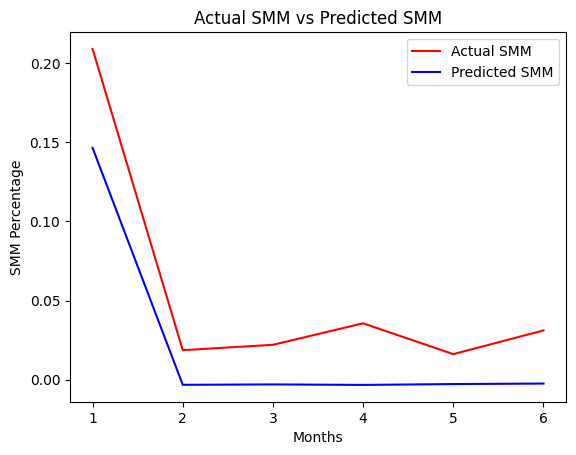

In [88]:
import matplotlib.pyplot as plt
import numpy as np
months = np.arange(1, 7) 

act_smm=np.asarray(actual_smm)
pred_smm=np.asarray(predicted_smm)



plt.plot(months, act_smm[:6]*100, label='Actual SMM',color='red')
plt.plot(months, pred_smm[:6]*100, label='Predicted SMM',color='blue')

plt.xlabel('Months')
plt.ylabel('SMM Percentage')
plt.title('Actual SMM vs Predicted SMM')

# plt.yticks(np.arange(-1,1,0.1))

plt.legend()

plt.show()


In [89]:
pred_smm

array([ 1.46388825e-03, -3.19005542e-05, -2.92926016e-05, -3.25357780e-05,
       -2.71999750e-05, -2.38219898e-05, -2.68307055e-05])

In [90]:
act_smm

array([0.00208847, 0.00018684, 0.00022069, 0.00035634, 0.00016175,
       0.00031146, 0.00389089])

In [91]:
act_smm-pred_smm

array([0.00062458, 0.00021874, 0.00024999, 0.00038887, 0.00018895,
       0.00033529, 0.00391772])

In [92]:
actual_smm
for i in range(len(actual_smm)):
    # if actual_smm[i]<0:
    #     actual_smm[i]=0
    actual_smm[i]=actual_smm[i]

In [93]:
predicted_smm
for i in range(len(predicted_smm)):
    # if predicted_smm[i]<0:
    #     predicted_smm[i]=0
    predicted_smm[i]=predicted_smm[i]

predicted_smm

[0.0014638882509110185,
 -3.190055418079307e-05,
 -2.929260159535936e-05,
 -3.253577803771938e-05,
 -2.7199974958778283e-05,
 -2.3821989812891353e-05,
 -2.6830705509184685e-05]

In [94]:
actual_cpr=[]
predicted_cpr=[]


for i in range(7):
    acpr=1-pow(1-act_smm[i],12)
    pcpr=1-pow(1-pred_smm[i],12)

    actual_cpr.append(acpr)
    predicted_cpr.append(pcpr)
    

In [95]:
for i in range(len(li2)):
    print(i+1)
    for j in range(len(li2[0])):
        print(li2[i][j]-actual_list_upb[i][j])
    print('\n')

1
172.625
219.63000000000466
488.60250000003725
748.3024999999907
1002.7299999999814
1282.217500000028
1554.390000000014


2
215.8125
427.875
630.1274999999441
832.7724999999627
1027.0250000000233
1216.8225000000093
1435.9875000000466


3
504.09249999999884
777.327500000014
576.780625000014
626.2012500000128
674.8031250000058
976.1118750000023
1023.2618749999965


4
128.25
752.8125
952.25
1149.2524999999441
1343.2774999999674
1535.8874999999534
1727.467500000028


5
779.0
451.27624999999534
495.8150000000023
563.773749999993
626.2150000000256
1975.8862499999814
734.2924999999814


6
295.640625
478.83312500000466
531.8856249999953
565.0512499999895
-165.21437500001048
-144.015625
-128.48687500000233


7
784.8575000000419
-495.5799999999581
377.21750000002794
1895.829999999958
2135.997500000056
3024.967500000028
3919.407499999972


8
489.9375
407.87375000002794
470.72375000000466
530.5524999999907
589.422499999986
646.03125
699.8162499999744


9
646.203125
44.08749999999418
-64.460625000

In [96]:
actual_cpr

[0.024775791233205724,
 0.0022398286686604596,
 0.0026451001268387175,
 0.004267670794256384,
 0.001939328465782153,
 0.0037311784641116397,
 0.04570438284574341]

In [97]:
predicted_cpr

[0.017425910956225588,
 -0.00038287382190671515,
 -0.00035156785640499955,
 -0.00039049921010292366,
 -0.0003264485332832301,
 -0.0002859013348852635,
 -0.00032201598288517097]

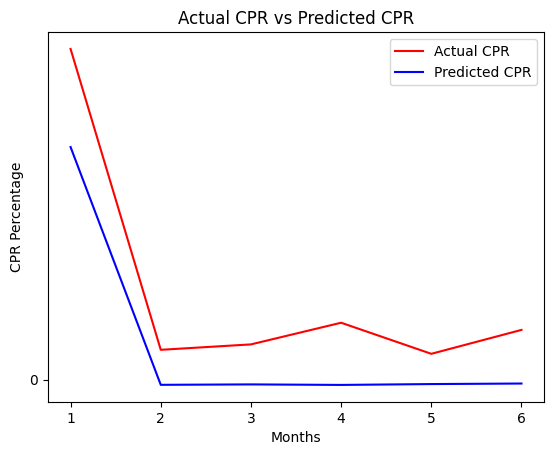

In [98]:
months = np.arange(1, 7) 

act_cpr=np.asarray(actual_cpr)
pred_cpr=np.asarray(predicted_cpr)

# act_cpr=act_cpr*100
# pred_cpr=pred_cpr*100

plt.plot(months, act_cpr[:6]*100, label='Actual CPR',color='red')
plt.plot(months, pred_cpr[:6]*100, label='Predicted CPR',color='blue')

plt.xlabel('Months')
plt.ylabel('CPR Percentage')
plt.title('Actual CPR vs Predicted CPR')

plt.yticks(np.arange(0,1,1))

plt.legend()

plt.show()

In [99]:
np.mean(act_cpr)

0.012186182942656927

In [100]:
actual_rolling_cpr=[]
predicted_rolling_cpr=[]

for i in range(len(act_smm)):
    k=1
    for j in range(i+1):
        k=k*(1-act_smm[j])

    val=1-pow(k,12/(i+1))
    actual_rolling_cpr.append(val)

for i in range(len(pred_smm)):
    k=1
    for j in range(i+1):
        k=k*(1-pred_smm[j])

    val=1-pow(k,12/(i+1))
    predicted_rolling_cpr.append(val)

In [101]:
actual_rolling_cpr

[0.024775791233205724,
 0.013572165018835847,
 0.00994317717829396,
 0.008527340567061725,
 0.007213226264723094,
 0.006633731258963049,
 0.01231169434466417]

In [102]:
predicted_rolling_cpr

[0.017425910956225588,
 0.008561504206865411,
 0.005599339192347674,
 0.00410525027316877,
 0.003220483985687417,
 0.0026369411552640276,
 0.0022147694714965693]

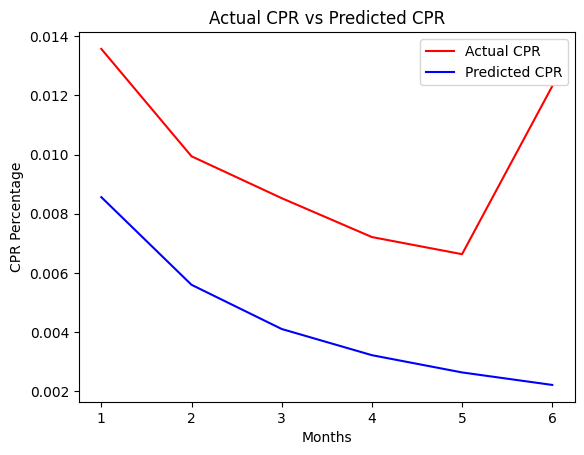

In [103]:
months = np.arange(1, 7) 

actual_rolling_cpr=np.asarray(actual_rolling_cpr)
predicted_rolling_cpr=np.asarray(predicted_rolling_cpr)

# act_cpr=act_cpr*100
# pred_cpr=pred_cpr*100

plt.plot(months, actual_rolling_cpr[1:], label='Actual CPR',color='red')
plt.plot(months, predicted_rolling_cpr[1:], label='Predicted CPR',color='blue')

plt.xlabel('Months')
plt.ylabel('CPR Percentage')
plt.title('Actual CPR vs Predicted CPR')

# plt.yticks(np.arange(0, 0.1,0.01))

plt.legend()

plt.show()

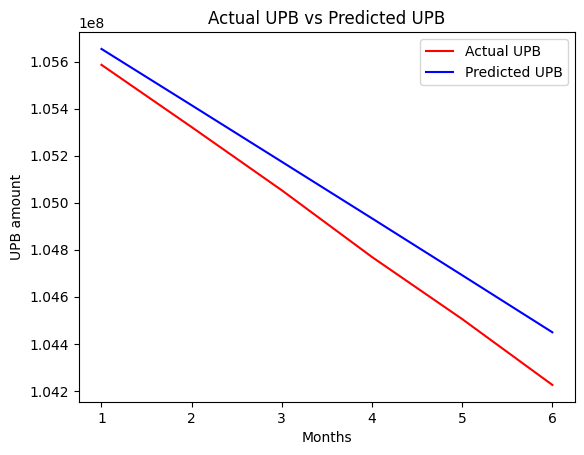

In [104]:
import matplotlib.pyplot as plt
import numpy as np
months = np.arange(1,7) 

act_smm=np.asarray(actual_smm)
pred_smm=np.asarray(predicted_smm)

act_smm=act_smm*100
pred_smm=pred_smm*100

plt.plot(months, monthly_cupb[:6], label='Actual UPB',color='red')
plt.plot(months, sum_list[:6], label='Predicted UPB',color='blue')

plt.xlabel('Months')
plt.ylabel('UPB amount')
plt.title('Actual UPB vs Predicted UPB')

# plt.yticks(np.arange(0, 10000000, 1000))

plt.legend()

plt.show()


In [106]:
cupb_act=monthly_cupb
cupb_pred=sum_list

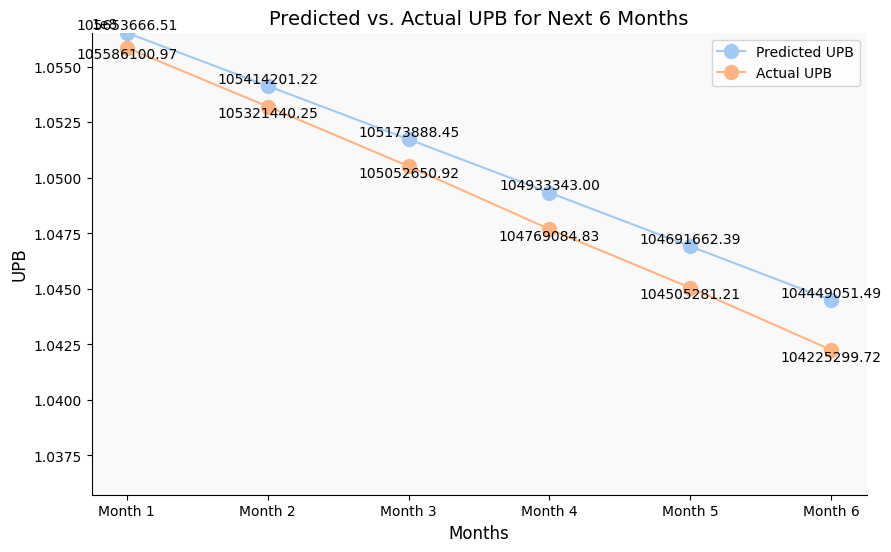

In [107]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data for the next 7 months
months = ['Month 1', 'Month 2', 'Month 3', 'Month 4', 'Month 5', 'Month 6']

# Generating colors for the plot
colors = sns.color_palette('pastel')[0:2]

# Creating a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the predicted and actual UPB values
ax.plot(months, cupb_pred[:6], marker='o', markersize=10, linestyle='-', color=colors[0], label='Predicted UPB')
ax.plot(months, cupb_act[:6], marker='o', markersize=10, linestyle='-', color=colors[1], label='Actual UPB')

# Adding value annotations for predicted UPB
for i in range(len(months)):
    ax.text(i, cupb_pred[i], f'{cupb_pred[i]:.2f}', ha='center', va='bottom', fontsize=10)

# Adding value annotations for actual UPB
for i in range(len(months)):
    ax.text(i, cupb_act[i], f'{cupb_act[i]:.2f}', ha='center', va='top', fontsize=10)

# Customizing the plot aesthetics
ax.set_xlabel('Months', fontsize=12)
ax.set_ylabel('UPB', fontsize=12)
ax.set_title('Predicted vs. Actual UPB for Next 6 Months', fontsize=14)
ax.legend(fontsize=10)

# Adjusting the y-axis limits
ax.set_ylim([min(np.min(cupb_pred), np.min(cupb_act)) - 100, max(np.max(cupb_pred), np.max(cupb_act)) + 100])

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding a background color to the plot
ax.set_facecolor('#F9F9F9')

# Showing the plot
plt.show()


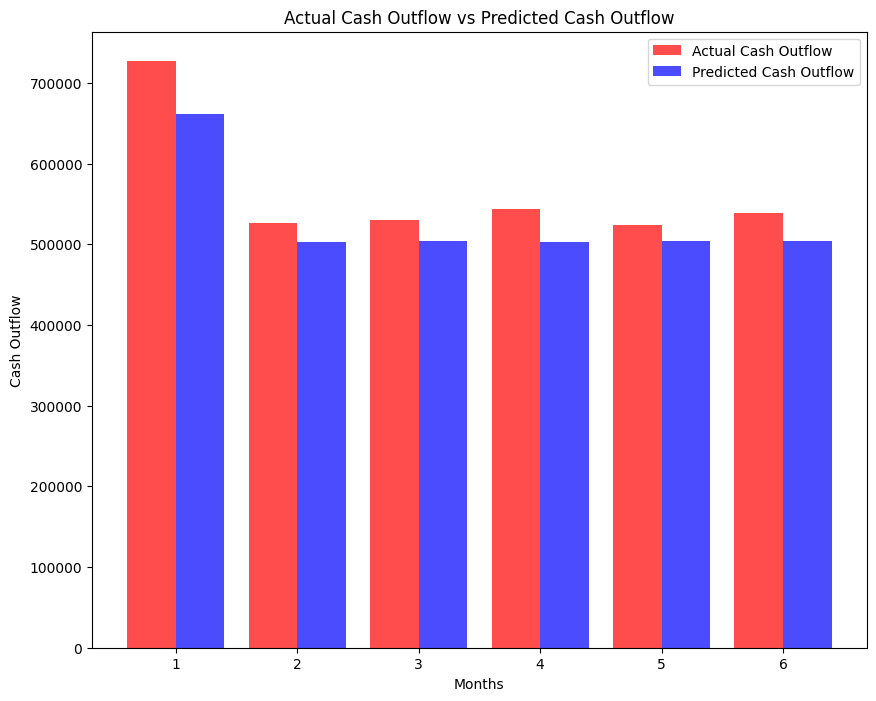

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

months = np.arange(1, 7)
bar_width = 0.4  # Width of each bar

plt.figure(figsize=(10,8))

plt.bar(months - bar_width/2, act_emi[:6], label='Actual Cash Outflow', color='red', width=bar_width, alpha=0.7)
plt.bar(months + bar_width/2, pred_emi[:6], label='Predicted Cash Outflow', color='blue', width=bar_width, alpha=0.7)

plt.xlabel('Months')
plt.ylabel('Cash Outflow')
plt.title('Actual Cash Outflow vs Predicted Cash Outflow')

plt.legend()
plt.show()


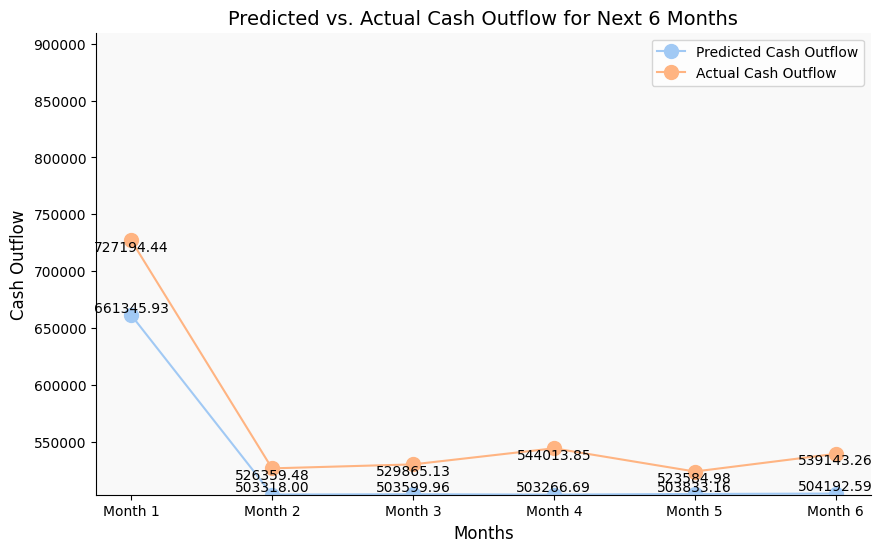

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data for the next 7 months
months = ['Month 1', 'Month 2', 'Month 3', 'Month 4', 'Month 5', 'Month 6']

# Generating colors for the plot
colors = sns.color_palette('pastel')[0:2]

# Creating a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the predicted and actual Cash Outflow values
ax.plot(months, pred_emi[:6], marker='o', markersize=10, linestyle='-', color=colors[0], label='Predicted Cash Outflow')
ax.plot(months, act_emi[:6], marker='o', markersize=10, linestyle='-', color=colors[1], label='Actual Cash Outflow')

# Adding value annotations for predicted Cash Outflow
for i in range(len(months)):
    ax.text(i, pred_emi[i], f'{pred_emi[i]:.2f}', ha='center', va='bottom', fontsize=10)

# Adding value annotations for actual Cash Outflow
for i in range(len(months)):
    ax.text(i, act_emi[i], f'{act_emi[i]:.2f}', ha='center', va='top', fontsize=10)

# Customizing the plot aesthetics
ax.set_xlabel('Months', fontsize=12)
ax.set_ylabel('Cash Outflow', fontsize=12)
ax.set_title('Predicted vs. Actual Cash Outflow for Next 6 Months', fontsize=14)
ax.legend(fontsize=10)

# Adjusting the y-axis limits
ax.set_ylim([min(np.min(pred_emi), np.min(act_emi)) - 100, max(np.max(pred_emi), np.max(act_emi)) + 100])

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding a background color to the plot
ax.set_facecolor('#F9F9F9')

# Showing the plot
plt.show()


In [ ]:
act_emi

[727194.4409166591,
 526359.4819787804,
 529865.125821566,
 544013.8508631521,
 523584.97636969143,
 539143.2585673628,
 909673.200851606]

In [ ]:
pred_emi

[661345.9344959557,
 503318.0019919697,
 503599.95661703474,
 503266.6854730213,
 503833.16283418646,
 504192.5891889781,
 503884.8481840596]

In [ ]:
for i in range(6):
    print(sum_list[i]-sum_list[i+1])

239465.28515625
240312.77734375
240545.44921875
241680.609375
242610.8984375
242874.55859375


In [ ]:
for i in range(6):
    print(monthly_cupb[i]-monthly_cupb[i+1])

264660.7199999094
268789.3299999535
283566.0900001228
263803.61999987066
279981.49000015855
652046.1899998933


In [ ]:
for i in range(6):
    print(monthly_cupb[i]-sum_list[i])

-67565.53781250119
-92760.9726561606
-121237.5253123641
-164258.1660937369
-186381.17671860754
-223751.7682812661


In [ ]:
monthly_cupb

[105586100.97,
 105321440.25000009,
 105052650.92000014,
 104769084.83000001,
 104505281.21000014,
 104225299.71999998,
 103573253.53000009]

In [ ]:
sum_list

[105653666.5078125,
 105414201.22265625,
 105173888.4453125,
 104933342.99609375,
 104691662.38671875,
 104449051.48828125,
 104206176.9296875]

In [ ]:
len(test_pool['Original UPB'])
# test_pool

354

In [ ]:
def_act=[]

for i in range(7):
    default=0

    for j in range(len(actual_list_smm)):
        if actual_list_smm[j][i]<0:
            default=default+1
    
    def_act.append(default)

def_act

[172, 180, 139, 132, 148, 142, 131]

In [ ]:
def_pred=[]

for j in range(7):
    default=0

    for j in range(len(predicted_list_smm)):
        if predicted_list_smm[j][i]<0:
            default=default+1

    def_pred.append(default)

def_pred

[181, 181, 181, 181, 181, 181, 181]

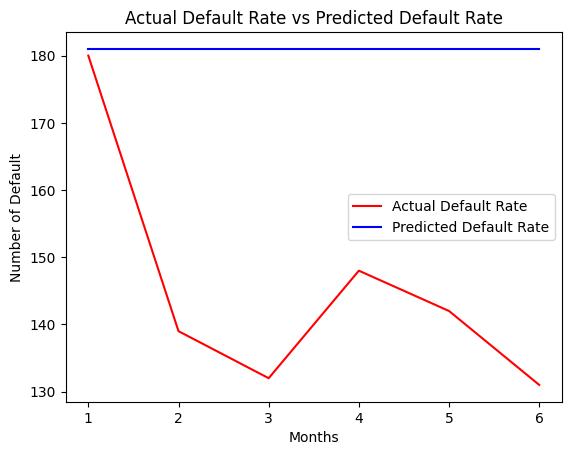

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
months = np.arange(1, 7) 

plt.plot(months, def_act[1:], label='Actual Default Rate',color='red')
plt.plot(months, def_pred[1:], label='Predicted Default Rate',color='blue')

plt.xlabel('Months')
plt.ylabel('Number of Default')
plt.title('Actual Default Rate vs Predicted Default Rate')

# plt.yticks(np.arange(0, 1000000, 10000))

plt.legend()

plt.show()


In [ ]:
li3=[]

for i in li2:
    li3=li3+i

In [ ]:
li3

[590172.6,
 589339.25,
 588492.8,
 587634.3,
 586767.75,
 585923.44,
 585069.0,
 561215.8,
 560427.9,
 559634.2,
 558827.8,
 558010.6,
 557186.56,
 556389.44,
 144774.06,
 144547.19,
 144346.64,
 144145.03,
 143941.95,
 143737.92,
 143531.42,
 613128.25,
 612248.56,
 611365.25,
 610476.8,
 609582.7,
 608684.44,
 607782.44,
 385779.0,
 384549.4,
 383311.62,
 382094.6,
 380869.38,
 379635.66,
 378394.06,
 144295.64,
 143585.2,
 142868.77,
 142145.28,
 141415.02,
 140677.98,
 139933.7,
 805718.44,
 804438.0,
 803155.44,
 801869.5,
 800587.2,
 799305.94,
 798025.2,
 327489.94,
 327007.84,
 326521.84,
 326031.3,
 325538.3,
 325041.53,
 324540.4,
 156646.2,
 156288.19,
 155925.86,
 155559.23,
 155188.22,
 154812.75,
 154432.78,
 396238.25,
 395470.47,
 394728.22,
 393979.53,
 393223.9,
 392463.22,
 391696.22,
 163544.53,
 163112.95,
 162677.84,
 162238.81,
 161797.33,
 161353.11,
 160906.31,
 318605.9,
 318210.22,
 317811.7,
 317409.72,
 317007.1,
 316602.8,
 316196.56,
 277800.22,
 277597.2

In [ ]:
li3

[590172.6,
 589339.25,
 588492.8,
 587634.3,
 586767.75,
 585923.44,
 585069.0,
 561215.8,
 560427.9,
 559634.2,
 558827.8,
 558010.6,
 557186.56,
 556389.44,
 144774.06,
 144547.19,
 144346.64,
 144145.03,
 143941.95,
 143737.92,
 143531.42,
 613128.25,
 612248.56,
 611365.25,
 610476.8,
 609582.7,
 608684.44,
 607782.44,
 385779.0,
 384549.4,
 383311.62,
 382094.6,
 380869.38,
 379635.66,
 378394.06,
 144295.64,
 143585.2,
 142868.77,
 142145.28,
 141415.02,
 140677.98,
 139933.7,
 805718.44,
 804438.0,
 803155.44,
 801869.5,
 800587.2,
 799305.94,
 798025.2,
 327489.94,
 327007.84,
 326521.84,
 326031.3,
 325538.3,
 325041.53,
 324540.4,
 156646.2,
 156288.19,
 155925.86,
 155559.23,
 155188.22,
 154812.75,
 154432.78,
 396238.25,
 395470.47,
 394728.22,
 393979.53,
 393223.9,
 392463.22,
 391696.22,
 163544.53,
 163112.95,
 162677.84,
 162238.81,
 161797.33,
 161353.11,
 160906.31,
 318605.9,
 318210.22,
 317811.7,
 317409.72,
 317007.1,
 316602.8,
 316196.56,
 277800.22,
 277597.2

In [ ]:
li4=np.asarray(li4)
li3=np.asarray(li3)
li5=abs(li4-li3)
li5.mean()

ValueError: operands could not be broadcast together with shapes (2492,) (2478,) 

In [ ]:
pre_upb=np.sum(li4)
cur_upb=np.sum(li3)

In [ ]:
pre_upb

61445029.64

In [ ]:
cur_upb

61443110.0

In [ ]:
(cur_upb-pre_upb)/pre_upb

-3.12090336880924e-05

In [ ]:
len(li4[0:31])

31

In [ ]:
test_pool[0:5]

,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,Original Loan to Value Ratio (LTV),...,Modification Flag,Zero Balance Code,Special Eligibility Program,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,Previous_UPB,Remaining MFM
0,82021,2,3.000,3.000,597000.0,590000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.3,591000.0,353
7,72021,2,2.875,2.875,566000.0,561000.00,360,12021,32021,57,...,0.0,0.0,0,3,1,5.3,2.5,5.4,562000.0,354
14,122021,0,3.300,3.300,330000.0,327000.00,360,52021,72021,80,...,0.0,0.0,0,0,0,5.3,2.5,7.0,328000.0,353
21,112021,1,2.750,2.750,401000.0,395938.66,360,32021,52021,67,...,0.0,0.0,0,3,0,5.3,2.5,6.8,397000.0,352
28,102021,2,2.990,2.990,384000.0,381000.00,360,42021,62021,80,...,0.0,0.0,0,0,0,5.3,2.5,6.2,381000.0,354


In [ ]:
(testing_x)

NameError: name 'testing_x' is not defined

In [ ]:
testing_x[0]

array([-1.02954984,  0.84383406, -1.55350925, -1.31814191,  3.66609448,
        0.60030419, -1.61128169, -1.01986277,  0.19222231,  0.34209664,
        0.81302176, -0.42491108,  1.32517563,  0.48097901, -0.15472204,
        0.08211211, -0.53040637,  0.90130701, -0.39673819, -0.12827818,
       -0.1805408 , -0.11415215, -0.16041107, -0.15799407,  9.77825071,
       -0.33494945, -1.22110499,  0.08337639,  3.88398382,  0.96277591])

In [ ]:
fore=[]

p=testing_x[0]
pre=p[28]
single_entry = np.expand_dims(p, axis=0)

In [ ]:
for i in range(6): 
    # print(i)   
    g=model.predict(single_entry)
    fore.append(g[0][0])

    print(g[0][0])

    test_unscaled['Previous_UPB']=g[0][0]
    test_unscaled['Monthly Reporting Period']=update(int(test_unscaled['Monthly Reporting Period']))
    k=str(int(test_unscaled['Monthly Reporting Period']))
    k=k[::-1]
    r=k[:4]

    r=r[::-1]
    print(r)

    if(k=="52023"):
        print("done")
        break
    
    test_unscaled['Unemployment_rate']=Unemploy[r]
    test_unscaled['Divorce_rate']=divorce[r]
    test_unscaled['Inflation_rate']=inflation_data[str(int(test_unscaled['Monthly Reporting Period']))]
    test_unscaled['Remaining MFM']=int(test_unscaled['Remaining MFM'])-1

    # l=single_entry[0]
    # l[-1]=scale(l[-1]-1,29)
    # print(l[0])
    # l[0]=update(l[0])
    # print(l[0])
    
    # print(k)
    # l[25]=Unemploy[r]
    # l[25]=scale(l[25],25)
    # # l[-1]=(l[-1]-1-270.868240)/90.489321
    # # l[0]=(update(l[0])-67492.295858)/34497.797429	
    # l[28]=scale(g, scl.mean_[28], scl.scale_[28])
    # l[0]=scale(l[0],0)

    # print(test_unscaled)
    
    test_scaled=(scl.transform(test_unscaled))[0]
    single_entry = np.expand_dims(test_scaled, axis=0)

1/1 [==============================] - 0s 25ms/step
596653.2
2021
1/1 [==============================] - 0s 23ms/step
596030.1
2021
1/1 [==============================] - 0s 28ms/step
595358.56
2021
1/1 [==============================] - 0s 25ms/step
594685.25
2021
1/1 [==============================] - 0s 28ms/step
594009.0
2021
1/1 [==============================] - 0s 57ms/step
593329.4
2021


In [ ]:
fore

[596653.2, 596030.1, 595358.56, 594685.25, 594009.0, 593329.4]

In [ ]:
# def update(mrp):
#     new_mrp = int(mrp)
#     if((new_mrp//10000)==12):
#         new_mrp = new_mrp - 110000 + 1
#     else:
#         new_mrp += 10000
#     return new_mrp
# print(update('122002'))

In [ ]:
test1_y

NameError: name 'test1_y' is not defined

In [ ]:
for i in range(len(fore)):
    print(fore[i]-test1_y[i])

-346.8125
30.125
358.5625
685.25
2009.0
2329.375


In [ ]:
# X_train_1.describe()

,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Original Loan Term,Origination Date,First Payment Date,Original Loan to Value Ratio (LTV),Debt-To-Income (DTI),...,Modification Flag,Zero Balance Code,Special Eligibility Program,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,Previous_UPB,Remaining MFM
count,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,...,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.00000,804139.000000,804139.000000,804139.000000,804139.000000
mean,67492.295858,1.398669,5.112216,4.983585,187677.681346,312.137781,67319.894812,66955.339365,71.578742,34.126307,...,0.051592,0.018257,0.046860,3.242918,0.010346,5.93966,3.128324,2.439492,170358.980081,270.868240
std,34497.797429,0.713811,1.361030,1.504040,111821.292224,79.729861,34307.612765,34256.668292,17.715732,11.308050,...,0.287244,0.160058,0.292056,1.543653,0.101190,1.90471,0.514733,1.920493,110003.999783,90.489321
min,12000.000000,0.000000,1.750000,0.000000,10000.000000,96.000000,11999.000000,12000.000000,5.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.60000,2.300000,-2.100000,0.000000,-62.000000
25%,42002.000000,1.000000,4.000000,4.000000,104000.000000,240.000000,42001.000000,42001.000000,62.000000,26.000000,...,0.000000,0.000000,0.000000,4.000000,0.000000,4.40000,2.700000,1.400000,88485.830000,191.000000
50%,72003.000000,2.000000,4.875000,4.875000,161000.000000,360.000000,62020.000000,72000.000000,76.000000,35.000000,...,0.000000,0.000000,0.000000,4.000000,0.000000,5.30000,3.200000,2.100000,145000.000000,314.000000
75%,102002.000000,2.000000,6.125000,6.000000,248000.000000,360.000000,102000.000000,92019.000000,80.000000,42.000000,...,0.000000,0.000000,0.000000,4.000000,0.000000,8.10000,3.600000,3.000000,227768.860000,342.000000
max,122022.000000,2.000000,9.875000,9.875000,813000.000000,360.000000,122020.000000,122020.000000,97.000000,64.000000,...,2.000000,7.000000,2.000000,4.000000,1.000000,9.60000,4.000000,9.100000,813000.000000,360.000000


In [ ]:
test1=pd.read_csv('test1.csv')
test1

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,Previous_UPB,Remaining MFM
0,122752190,22021,2,3.0,3.0,597000.0,597000.00,360,12021,32021,...,3,1,5.3,2.5,1.7,2516.976081,0.00,1492.5,597000.00,359
1,122752190,32021,2,3.0,3.0,597000.0,596000.00,360,12021,32021,...,3,1,5.3,2.5,2.6,2516.976081,1000.00,1492.5,597000.00,358
2,122752190,42021,2,3.0,3.0,597000.0,595000.00,360,12021,32021,...,3,1,5.3,2.5,4.2,2516.976081,1000.00,1492.5,596000.00,357
3,122752190,52021,2,3.0,3.0,597000.0,594000.00,360,12021,32021,...,3,1,5.3,2.5,5.0,2516.976081,1000.00,1492.5,595000.00,356
4,122752190,62021,2,3.0,3.0,597000.0,592000.00,360,12021,32021,...,3,1,5.3,2.5,5.4,2516.976081,2000.00,1492.5,594000.00,355
5,122752190,72021,2,3.0,3.0,597000.0,591000.00,360,12021,32021,...,3,1,5.3,2.5,5.4,2516.976081,1000.00,1492.5,592000.00,354
6,122752190,82021,2,3.0,3.0,597000.0,590000.00,360,12021,32021,...,3,1,5.3,2.5,5.3,2516.976081,1000.00,1492.5,591000.00,353
7,122752190,92021,2,3.0,3.0,597000.0,589119.62,360,12021,32021,...,3,1,5.3,2.5,5.4,2516.976081,880.38,1492.5,590000.00,352
8,122752190,102021,2,3.0,3.0,597000.0,588004.21,360,12021,32021,...,3,1,5.3,2.5,6.2,2516.976081,1115.41,1492.5,589119.62,351
9,122752190,112021,2,3.0,3.0,597000.0,586886.01,360,12021,32021,...,3,1,5.3,2.5,6.8,2516.976081,1118.20,1492.5,588004.21,350


In [ ]:
test1.drop(['Loan Identifier','EMI','UPB_diff','Interest_Component','Remaining Months To Maturity'], axis=1, inplace = True)
test1

,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,Original Loan to Value Ratio (LTV),...,Modification Flag,Zero Balance Code,Special Eligibility Program,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,Previous_UPB,Remaining MFM
0,22021,2,3.0,3.0,597000.0,597000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,1.7,597000.00,359
1,32021,2,3.0,3.0,597000.0,596000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,2.6,597000.00,358
2,42021,2,3.0,3.0,597000.0,595000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,4.2,596000.00,357
3,52021,2,3.0,3.0,597000.0,594000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.0,595000.00,356
4,62021,2,3.0,3.0,597000.0,592000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.4,594000.00,355
5,72021,2,3.0,3.0,597000.0,591000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.4,592000.00,354
6,82021,2,3.0,3.0,597000.0,590000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.3,591000.00,353
7,92021,2,3.0,3.0,597000.0,589119.62,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.4,590000.00,352
8,102021,2,3.0,3.0,597000.0,588004.21,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,6.2,589119.62,351
9,112021,2,3.0,3.0,597000.0,586886.01,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,6.8,588004.21,350


In [ ]:
test1_x=test1.drop(['Current Actual UPB'],axis=1)

In [ ]:
test1_y=test1['Current Actual UPB']

In [ ]:
test1_x=scl.transform(test1_x)

In [ ]:
pred=model.predict(test1_x)

1/1 [==============================] - 0s 19ms/step


In [ ]:
test1_y

0     597000.00
1     596000.00
2     595000.00
3     594000.00
4     592000.00
5     591000.00
6     590000.00
7     589119.62
8     588004.21
9     586886.01
10    585765.02
11    584641.22
12    583514.61
13    582385.19
14    581252.94
15    580117.86
16    578979.94
17    577839.18
18    576695.57
19    575549.10
20    574399.76
21    573247.55
22    572092.46
Name: Current Actual UPB, dtype: float64

In [ ]:
pred

array([[596774.4 ],
       [596653.2 ],
       [595325.6 ],
       [594324.7 ],
       [593321.9 ],
       [591314.1 ],
       [590309.5 ],
       [589305.75],
       [588424.25],
       [587306.2 ],
       [586184.06],
       [585077.25],
       [583952.9 ],
       [582826.2 ],
       [581694.5 ],
       [580561.4 ],
       [579425.94],
       [578283.75],
       [577137.6 ],
       [575989.06],
       [574836.25],
       [573680.2 ],
       [572521.3 ]], dtype=float32)

In [ ]:
mean_absolute_error(pred,test1_y)

443.084673913054

In [ ]:
for i in range(len(pred)):
    print(pred[i]-test1_y[i])

[-225.625]
[653.1875]
[325.625]
[324.6875]
[1321.875]
[314.125]
[309.5]
[186.125]
[420.0625]
[420.1875]
[419.0625]
[436.]
[438.25]
[441.]
[441.5625]
[443.5]
[446.]
[444.5625]
[442.0625]
[439.9375]
[436.5]
[432.625]
[428.875]


In [ ]:
list(df['UPB_diff'])

[1129.42,
 1132.25,
 1135.08,
 1137.92,
 1140.76,
 1143.61,
 1146.47,
 1021.16,
 1023.61,
 1026.06,
 1028.52,
 1030.99,
 1033.46,
 1035.93,
 764.52,
 766.35,
 768.18,
 770.02,
 771.87,
 773.72,
 775.57,
 1000.0,
 1000.0,
 1000.0,
 1504.25,
 1082.75,
 1085.44,
 1088.15,
 269.98,
 270.59,
 271.21,
 271.84,
 272.46,
 273.08,
 273.71,
 524.09,
 525.56,
 527.03,
 528.51,
 529.99,
 531.47,
 532.96,
 550.36,
 551.87,
 553.39,
 554.91,
 556.44,
 557.97,
 559.5,
 2000.0,
 2000.0,
 2000.0,
 1618.93,
 1986.07,
 1990.41,
 1994.77,
 734.72,
 736.4,
 738.09,
 739.78,
 741.48,
 743.18,
 744.88,
 496.38,
 497.78,
 499.18,
 500.58,
 501.99,
 503.4,
 504.82,
 376.09,
 377.25,
 378.21,
 379.03,
 380.18,
 381.17,
 382.0,
 1235.03,
 1237.48,
 1239.93,
 1242.38,
 1244.84,
 1247.3,
 1249.77,
 294.53,
 641.83,
 643.57,
 645.31,
 647.06,
 648.81,
 650.57,
 1327.35,
 1330.4,
 1333.45,
 2409.31,
 1342.02,
 1345.1,
 1348.18,
 1228.1,
 1230.14,
 1232.18,
 1234.22,
 1236.27,
 1238.32,
 1240.37,
 2000.0,
 1000.0,
 1

In [ ]:
import numpy as np

# Original predictions from your model
original_predictions = np.array([200, 300, 400, 500])

# Growth rate adjustment factor
growth_rate = 0.01

# Compute adjusted predictions using exponential growth
adjusted_predictions = original_predictions * (1/np.exp(growth_rate))

# Print the adjusted predictions
print("Adjusted Predictions:", adjusted_predictions)


Adjusted Predictions: [198.00996675 297.01495012 396.0199335  495.02491687]
